<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

### Main Report Sections:
<a id="start"></a>
#### 1. [Code](#1)

#### 2. [Report](#2)

# 1. Code <a id="1"></a>
[Back to top](#start)

In [3]:
# import the packages
# import the pacakges
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for dealing with outliers
from feature_engine.outliers import Winsorizer

# for step 3 train test split
from sklearn.model_selection import train_test_split

# for transforming numerical data
import scipy.stats as stats
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer

# for one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder
# for encoding with feature-engine
from feature_engine.encoding import MeanEncoder
# for integer encoding using feature-engine
from feature_engine.encoding import OrdinalEncoder
# to encode with feature-engine
from feature_engine.encoding import CountFrequencyEncoder

# for discretization
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualWidthDiscretiser

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler
# the scalers - for mean normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler
# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
# the scaler - for robust scaling
from sklearn.preprocessing import RobustScaler

### Step 1: Load and Explore the Data

#### 3.1 Load & Explore the Data

In [4]:
results_mod_data = pd.read_csv('./f1db_csv_mod/results_mod.csv')
circuits_mod_data = pd.read_csv('./f1db_csv_mod/circuits_mod.csv')
constructor_results_mod_data = pd.read_csv('./f1db_csv_mod/constructor_results_mod.csv')
constructor_standings_mod_data = pd.read_csv('./f1db_csv_mod/constructor_standings_mod.csv')
constructors_mod_data = pd.read_csv('./f1db_csv_mod/constructors_mod.csv')
driver_standings_mod_data = pd.read_csv('./f1db_csv_mod/driver_standings_mod.csv')
drivers_mod_data = pd.read_csv('./f1db_csv_mod/drivers_mod.csv')
lap_times_mod_data = pd.read_csv('./f1db_csv_mod/lap_times_mod.csv')
pit_stops_mod_data = pd.read_csv('./f1db_csv_mod/pit_stops_mod.csv')
qualifying_mod_data = pd.read_csv('./f1db_csv_mod/qualifying_mod.csv')
races_mod_data = pd.read_csv('./f1db_csv_mod/races_mod.csv')
results_mod_data = pd.read_csv('./f1db_csv_mod/results_mod.csv')
seasons_mod_data = pd.read_csv('./f1db_csv_mod/seasons_mod.csv')
status_mod_data = pd.read_csv('./f1db_csv_mod/status_mod.csv')

In [5]:
# replace all '\N's with NaN
results_mod_data = results_mod_data.replace('\\N', np.nan)
circuits_mod_data = circuits_mod_data.replace('\\N', np.nan)
constructor_results_mod_data = constructor_results_mod_data.replace('\\N', np.nan)
constructor_standings_mod_data = constructor_standings_mod_data.replace('\\N', np.nan)
constructors_mod_data = constructors_mod_data.replace('\\N', np.nan)
driver_standings_mod_data = driver_standings_mod_data.replace('\\N', np.nan)
drivers_mod_data = drivers_mod_data.replace('\\N', np.nan)
lap_times_mod_data = lap_times_mod_data.replace('\\N', np.nan)
pit_stops_mod_data = pit_stops_mod_data.replace('\\N', np.nan)
qualifying_mod_data = qualifying_mod_data.replace('\\N', np.nan)
races_mod_data = races_mod_data.replace('\\N', np.nan)
results_mod_data = results_mod_data.replace('\\N', np.nan)
seasons_mod_data = seasons_mod_data.replace('\\N', np.nan)
status_mod_data = status_mod_data.replace('\\N', np.nan)

#### 3.2 Explore and Understand the Data

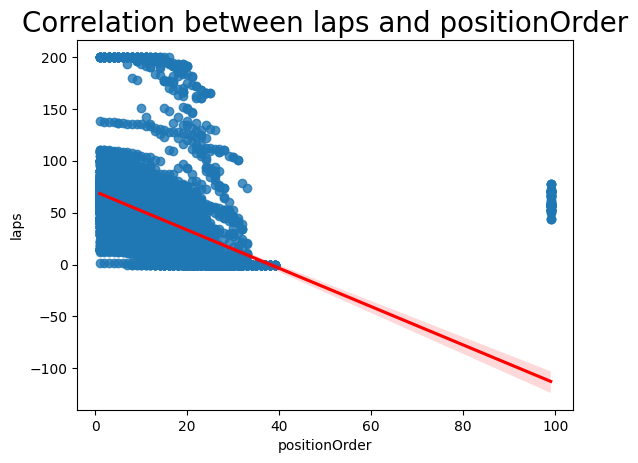

In [6]:
# Plot using Seaborn
sns.regplot(x='positionOrder', y='laps', data=results_mod_data, line_kws={"color": "red"})

# Tweak x-axis and y-axis ranges using Matplotlib
plt.title('Correlation between laps and positionOrder', fontsize=20)

# Display the plot
plt.show()

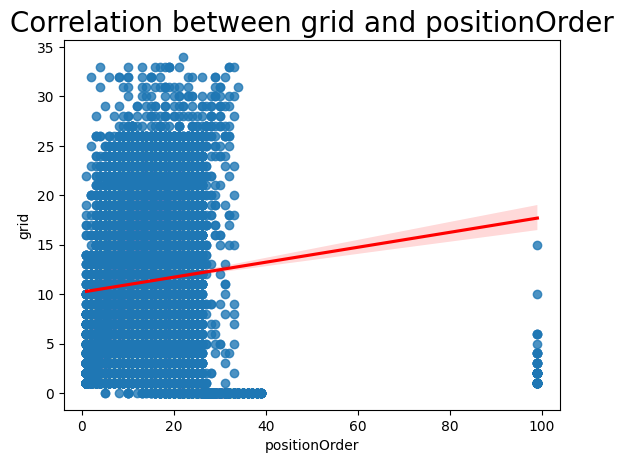

In [7]:
# Plot using Seaborn
sns.regplot(x='positionOrder', y='grid', data=results_mod_data, line_kws={"color": "red"})

# Tweak x-axis and y-axis ranges using Matplotlib
plt.title('Correlation between grid and positionOrder', fontsize=20)

# Display the plot
plt.show()

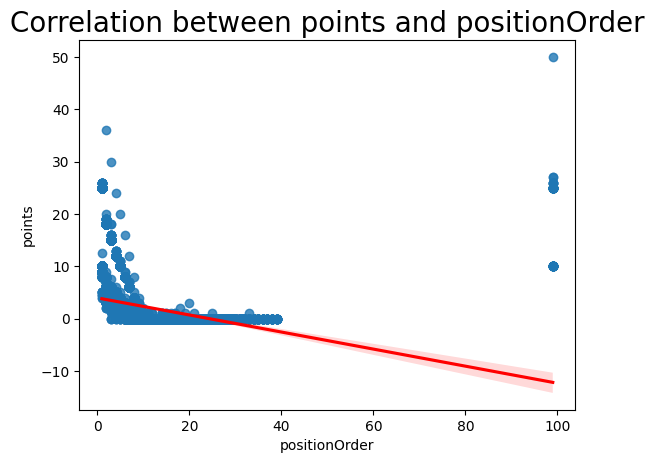

In [8]:
# Plot using Seaborn
sns.regplot(x='positionOrder', y='points', data=results_mod_data, line_kws={"color": "red"})

# Tweak x-axis and y-axis ranges using Matplotlib
plt.title('Correlation between points and positionOrder', fontsize=20)

# Display the plot
plt.show()

### Step 2: Data Wrangling on multiple tables 

#### 4.1 Using Results Table as Main Table and Dropping resultId Column

In [9]:
# use it as so called 'foundation' table
# start with this and merge other tables to it
results_mod_data

resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
25394     25400    1073       815              9     11     4       15   
25395     25401    1073       849              3      6    16      NaN   
25396     25402    1073       841             51     99    14      NaN   
25397     25403    1073       847              3     63    17      NaN   
25398     25404    1073         8             51      7    18      NaN   

      positionText  positionOrder  points  laps     time milliseconds  \
0                1              1    10.0    58  34:50.6      5690616   
1                2              2     8.0    58    5.478      5696094   
2                3              3     6.0    58    8.163      5698779   
3                4              4     5.0    58   17.181      5707797   
4                5              5     4.0    58   18.014      5708630   
...            ...            ...     ...   ...      ...          ...   
25394           15             15     0.0    55      NaN          NaN   
25395            R             16     0.0    50      NaN          NaN   
25396            R             17     0.0    33      NaN          NaN   
25397            R             18     0.0    26      NaN          NaN   
25398            R             19     0.0    25      NaN          NaN   

      fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0             39    2        01:27.5           218.3         1  
1             41    3        01:27.7         217.586         1  
2             41    5        01:28.1         216.719         1  
3             58    7        01:28.6         215.464         1  
4             43    1        01:27.4         218.385         1  
...          ...  ...            ...             ...       ...  
25394         51    2        01:26.4         219.993         5  
25395         30   15        01:29.3         212.912         3  
25396         33   16        01:29.4         212.557         6  
25397         23   19        01:30.6         209.732         6  
25398         23   18        01:29.7         211.951        23  

[25399 rows x 18 columns]

In [10]:
# drop resultId from results_mod_data as it is irrelavant in determining the position of the driver
results_mod_data = results_mod_data.drop('resultId', axis=1) # column_name, row/column
results_mod_data.head()

raceId  driverId  constructorId number  grid position positionText  \
0      18         1              1     22     1        1            1   
1      18         2              2      3     5        2            2   
2      18         3              3      7     7        3            3   
3      18         4              4      5    11        4            4   
4      18         5              1     23     3        5            5   

   positionOrder  points  laps     time milliseconds fastestLap rank  \
0              1    10.0    58  34:50.6      5690616         39    2   
1              2     8.0    58    5.478      5696094         41    3   
2              3     6.0    58    8.163      5698779         41    5   
3              4     5.0    58   17.181      5707797         58    7   
4              5     4.0    58   18.014      5708630         43    1   

  fastestLapTime fastestLapSpeed  statusId  
0        01:27.5           218.3         1  
1        01:27.7         217.586         1  
2        01:28.1         216.719         1  
3        01:28.6         215.464         1  
4        01:27.4         218.385         1

#### 4.2 Merge Drivers Table

In [11]:
# get driver data to be used
driver_data_wanted = drivers_mod_data[['driverId', 'dob', 'nationality']]
# merge with results table
results_mod_data = pd.merge(results_mod_data,driver_data_wanted,on='driverId',how='left').drop_duplicates()

In [12]:
results_mod_data

raceId  driverId  constructorId number  grid position positionText  \
0          18         1              1     22     1        1            1   
1          18         2              2      3     5        2            2   
2          18         3              3      7     7        3            3   
3          18         4              4      5    11        4            4   
4          18         5              1     23     3        5            5   
...       ...       ...            ...    ...   ...      ...          ...   
25394    1073       815              9     11     4       15           15   
25395    1073       849              3      6    16      NaN            R   
25396    1073       841             51     99    14      NaN            R   
25397    1073       847              3     63    17      NaN            R   
25398    1073         8             51      7    18      NaN            R   

       positionOrder  points  laps     time milliseconds fastestLap rank  \
0                  1    10.0    58  34:50.6      5690616         39    2   
1                  2     8.0    58    5.478      5696094         41    3   
2                  3     6.0    58    8.163      5698779         41    5   
3                  4     5.0    58   17.181      5707797         58    7   
4                  5     4.0    58   18.014      5708630         43    1   
...              ...     ...   ...      ...          ...        ...  ...   
25394             15     0.0    55      NaN          NaN         51    2   
25395             16     0.0    50      NaN          NaN         30   15   
25396             17     0.0    33      NaN          NaN         33   16   
25397             18     0.0    26      NaN          NaN         23   19   
25398             19     0.0    25      NaN          NaN         23   18   

      fastestLapTime fastestLapSpeed  statusId         dob nationality  
0            01:27.5           218.3         1  1985-01-07     British  
1            01:27.7         217.586         1  1977-05-10      German  
2            01:28.1         216.719         1  1985-06-27      German  
3            01:28.6         215.464         1  1981-07-29     Spanish  
4            01:27.4         218.385         1  1981-10-19     Finnish  
...              ...             ...       ...         ...         ...  
25394        01:26.4         219.993         5  1990-01-26     Mexican  
25395        01:29.3         212.912         3  1995-06-29    Canadian  
25396        01:29.4         212.557         6  1993-12-14     Italian  
25397        01:30.6         209.732         6  1998-02-15     British  
25398        01:29.7         211.951        23  1979-10-17     Finnish  

[25399 rows x 19 columns]

#### 4.3 Check and Deal with NaNs for Each Column

In [13]:
# Check how many columns have NaNs
results_mod_data.isnull().sum()

raceId                 0
driverId               0
constructorId          0
number                 6
grid                   0
position           10786
positionText           0
positionOrder          0
points                 0
laps                   0
time               18590
milliseconds       18591
fastestLap         18446
rank               18249
fastestLapTime     18446
fastestLapSpeed    18446
statusId               0
dob                    0
nationality            0
dtype: int64

In [14]:
# Due to overwhelming under of NaNs, we drop it
results_mod_data = results_mod_data.drop(['number', 'position', 'time', 'milliseconds', 'fastestLap', 'rank', 
                                          'fastestLapTime', 'fastestLapSpeed'], axis=1) # column_name, row/column

In [15]:
results_mod_data.head()

raceId  driverId  constructorId  grid positionText  positionOrder  points  \
0      18         1              1     1            1              1    10.0   
1      18         2              2     5            2              2     8.0   
2      18         3              3     7            3              3     6.0   
3      18         4              4    11            4              4     5.0   
4      18         5              1     3            5              5     4.0   

   laps  statusId         dob nationality  
0    58         1  1985-01-07     British  
1    58         1  1977-05-10      German  
2    58         1  1985-06-27      German  
3    58         1  1981-07-29     Spanish  
4    58         1  1981-10-19     Finnish

#### 4.4 Get Race Year

In [16]:
# replace the front part of the url
races_mod_data['url'] = races_mod_data['url'].str.replace('http://en.wikipedia.org/wiki/','')
races_mod_data['url'] = races_mod_data['url'].str.replace('https://en.wikipedia.org/wiki/','')

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\777500686.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  races_mod_data['url'] = races_mod_data['url'].str.replace('http://en.wikipedia.org/wiki/','')
C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\777500686.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  races_mod_data['url'] = races_mod_data['url'].str.replace('https://en.wikipedia.org/wiki/','')


In [17]:
# split the back part of the url with '_' as the delimiter
races_mod_data_split = races_mod_data['url'].str.split('_', expand = True)

# get the year after splitting
races_mod_data['url'] = races_mod_data_split[0]

# rename column 
races_mod_data = races_mod_data.rename(columns = {'url': 'race year'})

In [18]:
# replace values for the year that is not a number
races_mod_data['race year'] = races_mod_data['race year'].replace('70th', '2020')
races_mod_data['race year'] = races_mod_data['race year'].replace('São', '2021')

In [19]:
# convert column to integer type
races_mod_data['race year'] = races_mod_data['race year'].astype(int)

#### 4.5 Merge Races Table

In [20]:
# Merge race table with results table
races_wanted = races_mod_data[['raceId', 'race year', 'circuitId']]
results_mod_data = pd.merge(results_mod_data,races_wanted,on='raceId',how='left').drop_duplicates()

#### 4.6 Get Drivers' Age

In [21]:
# Get age of driver at time of race
# string array after splitting
results_mod_dob_year_split = results_mod_data['dob'].str.split('-', expand = True)

In [22]:
# age of driver at time of the race assigned to driver age column
results_mod_data['driver age'] = results_mod_data['race year'] - results_mod_dob_year_split[0].astype(int)

#### 4.7 Merge Circuits Table

In [23]:
circuits_merge = circuits_mod_data[['circuitId', 'name', 'alt']]
results_mod_data = pd.merge(results_mod_data, circuits_merge,on='circuitId',how='left').drop_duplicates()

In [24]:
results_mod_data = results_mod_data.rename(columns = {'name': 'circuit name'})

In [25]:
results_mod_data = results_mod_data.dropna(inplace = False)

In [26]:
results_mod_data['alt'] = results_mod_data['alt'].astype(int)

#### 4.8 Merge Constructors Table

In [27]:
constructor_merge = constructors_mod_data[['constructorId', 'name']]
results_mod_data = pd.merge(results_mod_data, constructor_merge,on='constructorId',how='left').drop_duplicates()

In [28]:
results_mod_data = results_mod_data.rename(columns = {'name': 'constructor name'})

#### 4.9 Create Target Column

In [29]:
results_mod_data['top 5'] = np.where(results_mod_data['positionOrder']<=5, 1, 0)

#### 4.10 Drop Columns

In [30]:
# Drop uneccessary data (such as all the IDs, URL...s)
# Drop columns with direct correlation with the win column
results_mod_data = results_mod_data.drop(['points', 'positionText', 'positionOrder', 'raceId', 
                                          'constructorId', 'circuitId', 'statusId', 'driverId', 'dob'], axis = 1)

In [31]:
data = results_mod_data

#### 4.11 Train, Test Split

In [32]:
# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('top 5', axis=1), data['top 5'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((17765, 8), (7614, 8))

#### 4.12 One Hot Encode

In [33]:
# One hot encoding for country column

ohe_enc = OneHotEncoder(
    top_categories=None,
    variables=['nationality', 'circuit name', 'constructor name'],
    drop_last=True)  # to return k-1, false to return k

In [34]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True,
              variables=['nationality', 'circuit name', 'constructor name'])

In [35]:
# we can see which variables the encoder will encode
ohe_enc.variables

['nationality', 'circuit name', 'constructor name']

In [36]:
# let's transform train and test set
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

c:\Users\donsu\.conda\envs\py38_env\lib\site-packages\feature_engine\encoding\one_hot.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
c:\Users\donsu\.conda\envs\py38_env\lib\site-packages\feature_engine\encoding\one_hot.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
c:\Users\donsu\.conda\envs\py38_env\lib\site-packages\feature_engine\encoding\one_hot.py:277: PerformanceWarning: Data

In [37]:
# let's inspect the encoded train set
X_train.head()

grid  laps  race year  driver age  alt  nationality_Italian  \
20454    19    70       2010          36    7                    1   
19394     7    80       1954          30   85                    1   
3974     20    65       1998          27  578                    0   
7417     13    10       1990          26  162                    0   
13707    12    73       1977          31  583                    0   

       nationality_Japanese  nationality_French  nationality_Australian  \
20454                     0                   0                       0   
19394                     0                   0                       0   
3974                      1                   0                       0   
7417                      0                   1                       0   
13707                     0                   0                       1   

       nationality_British  ...  constructor name_McGuire  \
20454                    0  ...                         0   
19394                    0  ...                         0   
3974                     0  ...                         0   
7417                     0  ...                         0   
13707                    0  ...                         0   

       constructor name_Pankratz  constructor name_Klenk  \
20454                          0                       0   
19394                          0                       0   
3974                           0                       0   
7417                           0                       0   
13707                          0                       0   

       constructor name_Elder  constructor name_Snowberger  \
20454                       0                            0   
19394                       0                            0   
3974                        0                            0   
7417                        0                            0   
13707                       0                            0   

       constructor name_Ferguson  constructor name_De Tomaso-Ferrari  \
20454                          0                                   0   
19394                          0                                   0   
3974                           0                                   0   
7417                           0                                   0   
13707                          0                                   0   

       constructor name_EMW  constructor name_Kauhsen  \
20454                     0                         0   
19394                     0                         0   
3974                      0                         0   
7417                      0                         0   
13707                     0                         0   

       constructor name_Cooper-ATS  
20454                            0  
19394                            0  
3974                             0  
7417                             0  
13707                            0  

[5 rows x 316 columns]

#### 4.13 Naive Baseline Model

In [38]:
y_labels = ['top 5']

In [39]:
import numpy as np
from scipy import stats

# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

print(f"The modal class label is {int(modal_class_label)}, \
and the accompanying string value of this label is {y_labels}.")

ModeResult(mode=array([0]), count=array([14123]))
The modal class label is 0, and the accompanying string value of this label is ['top 5'].


C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1311901028.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(y_train))
C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1311901028.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modal_class_l

In [40]:
y_train_preds_naive = [int(modal_class_label) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [41]:
y_test_preds_naive = [int(modal_class_label) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [42]:
# scoring accuracy of model
# note that other metrics exist, eg. AUC-ROC, Confusion Matrix-Based Metrics, but these matter more for imbalanced data
# where classes don't share same representation, eg. class 0 is 80%, class 1 is 10%, class 2 is 10%
# and are advanced Machine Learning topics

from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 79.50%.
The Naive Baseline Model's accuracy on test data is 78.88%.


### Step 3: Data Cleansing and Transformation

In [43]:
data

grid  laps nationality  race year  driver age  \
0         1    58     British       2008          23   
1         5    58      German       2008          31   
2         7    58      German       2008          23   
3        11    58     Spanish       2008          27   
4         3    58     Finnish       2008          27   
...     ...   ...         ...        ...         ...   
25374     4    55     Mexican       2021          31   
25375    16    50    Canadian       2021          26   
25376    14    33     Italian       2021          28   
25377    17    26     British       2021          23   
25378    18    25     Finnish       2021          42   

                         circuit name  alt constructor name  top 5  
0      Albert Park Grand Prix Circuit   10          McLaren      1  
1      Albert Park Grand Prix Circuit   10       BMW Sauber      1  
2      Albert Park Grand Prix Circuit   10         Williams      1  
3      Albert Park Grand Prix Circuit   10          Renault      1  
4      Albert Park Grand Prix Circuit   10          McLaren      1  
...                               ...  ...              ...    ...  
25374              Yas Marina Circuit    3         Red Bull      0  
25375              Yas Marina Circuit    3         Williams      0  
25376              Yas Marina Circuit    3       Alfa Romeo      0  
25377              Yas Marina Circuit    3         Williams      0  
25378              Yas Marina Circuit    3       Alfa Romeo      0  

[25379 rows x 9 columns]

#### Checking For Outlers

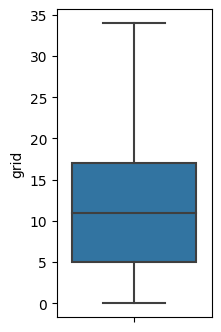

In [44]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['grid'])
plt.show()

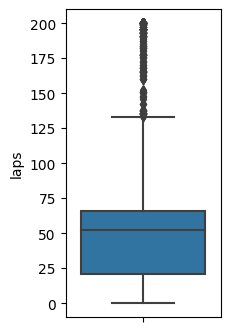

In [45]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['laps'])
plt.show()

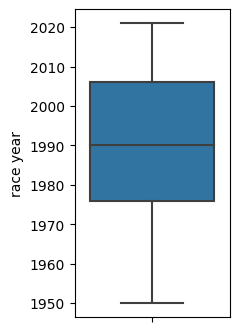

In [46]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['race year'])
plt.show()

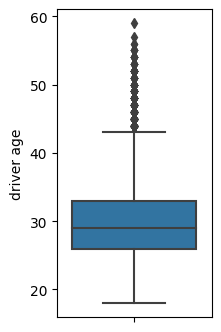

In [47]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['driver age'])
plt.show()

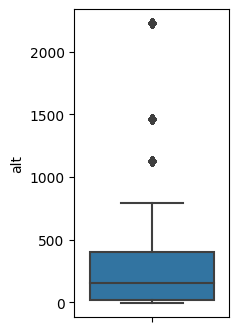

In [48]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['alt'])
plt.show()

#### Dealing with Outlers

In [49]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

laps_upper_limit, laps_lower_limit = find_boundaries(data, 'laps', 1.5)
outliers_laps = np.where(data['laps'] > laps_upper_limit, True,
                       np.where(data['laps'] < laps_lower_limit, True, False))

driver_age_upper_limit, driver_age_lower_limit = find_boundaries(data, 'driver age', 1.5)
outliers_driver_age = np.where(data['driver age'] > driver_age_upper_limit, True,
                       np.where(data['driver age'] < driver_age_lower_limit, True, False))

alt_upper_limit, alt_lower_limit = find_boundaries(data, 'alt', 1.5)
outliers_alt = np.where(data['alt'] > alt_upper_limit, True,
                       np.where(data['alt'] < alt_lower_limit, True, False))

data = data.loc[~(outliers_laps + outliers_driver_age + outliers_alt), ] 

#### Numerical Data Transformation

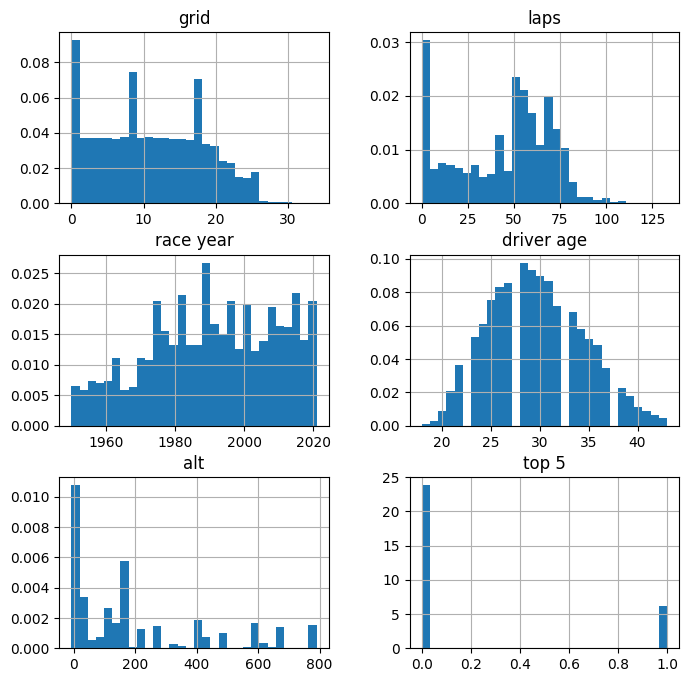

In [50]:
data.hist(bins=30, figsize=(8,8), density=True)
plt.show()

In [51]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1910976573.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


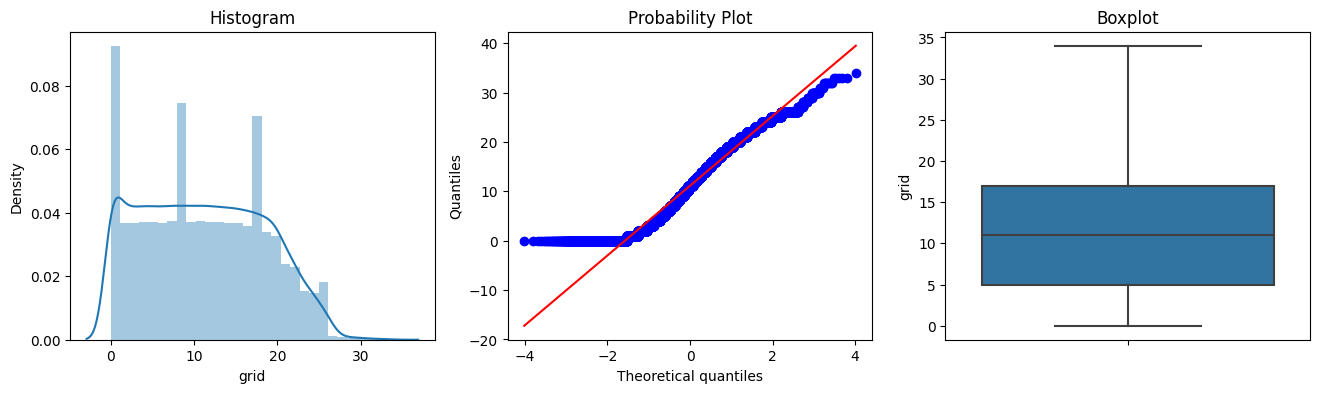

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1910976573.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


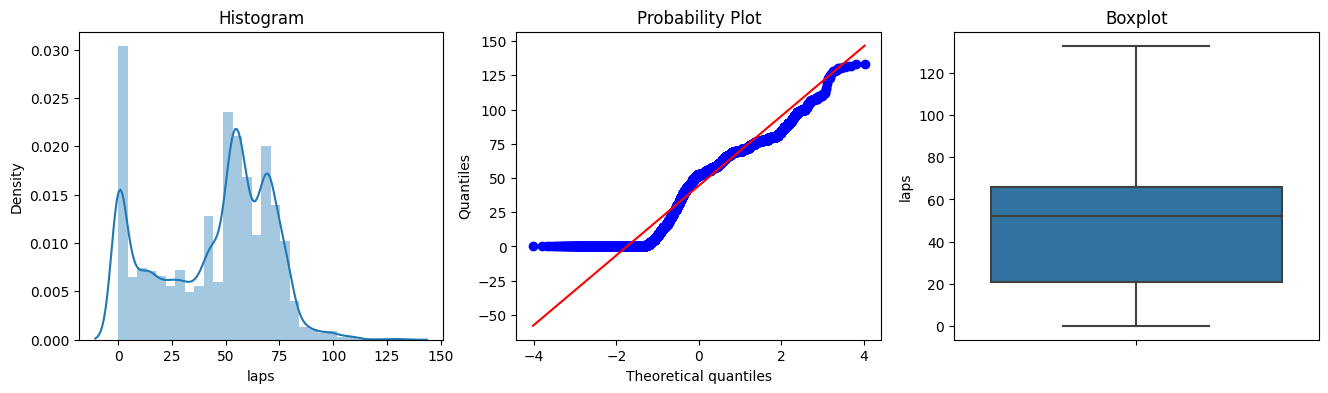

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1910976573.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


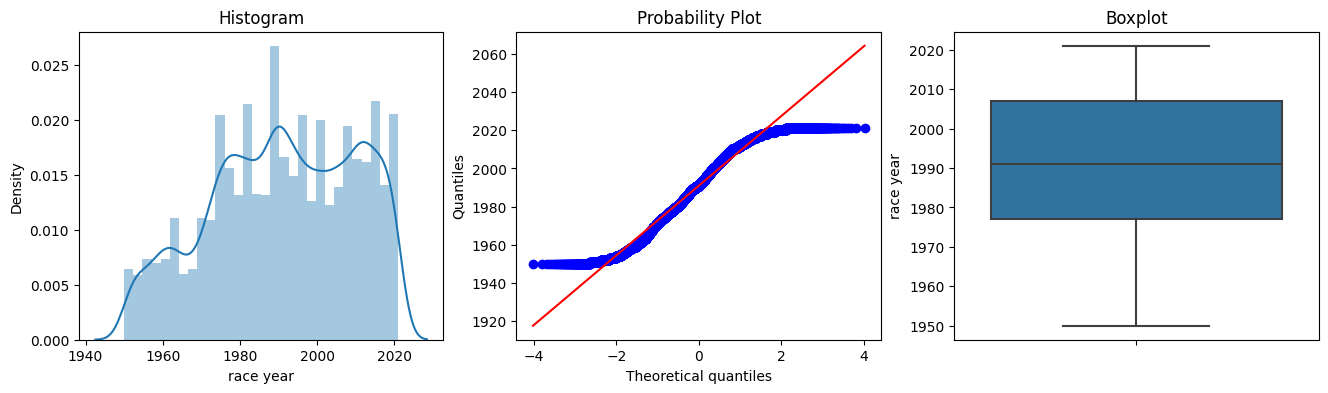

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1910976573.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


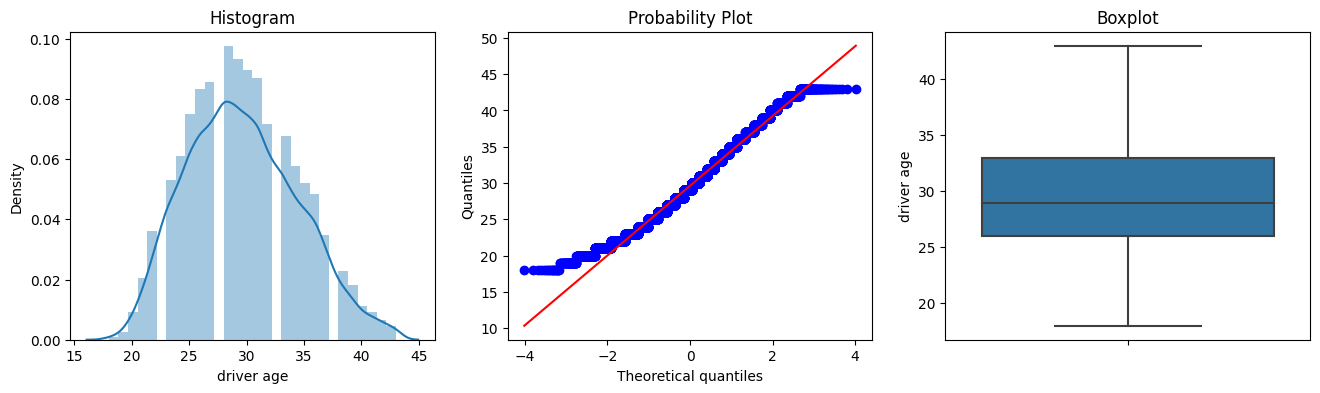

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1910976573.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


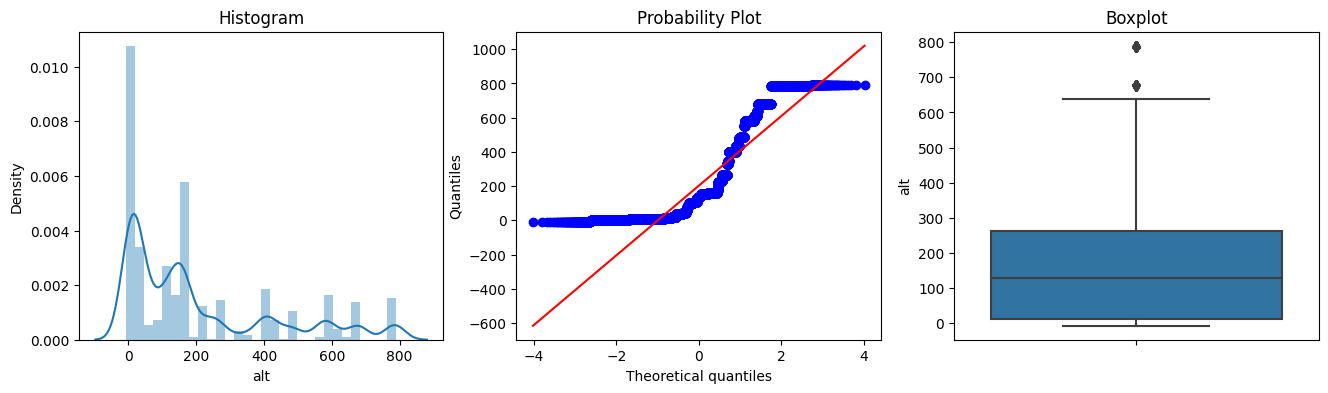

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1910976573.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


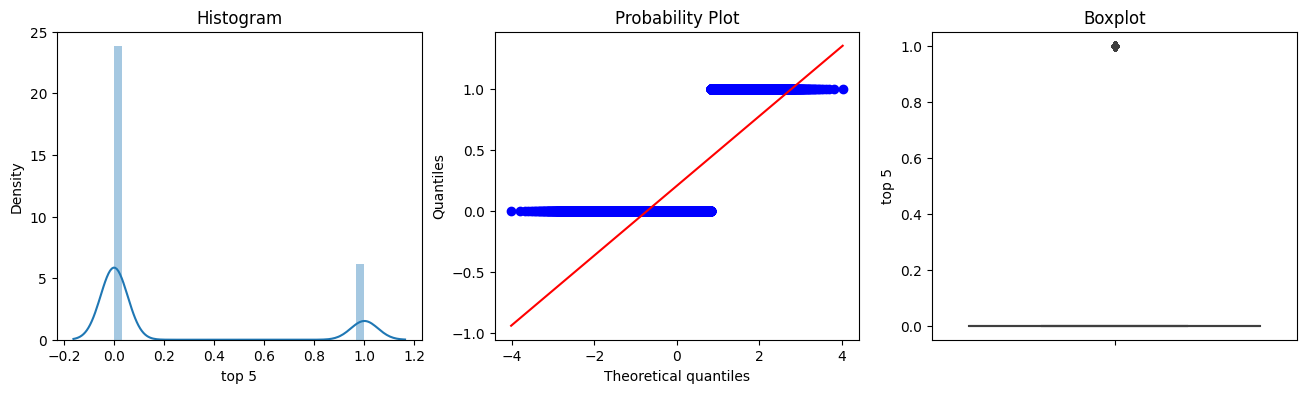

In [52]:
diagnostic_plots(data, 'grid')
diagnostic_plots(data, 'laps')
diagnostic_plots(data, 'race year')
diagnostic_plots(data, 'driver age')
diagnostic_plots(data, 'alt')
diagnostic_plots(data, 'top 5')

In [53]:
# initialize the transformer
lt = LogTransformer(variables=['driver age', 'race year']) 

# fit transformer to data set
lt.fit(data)

data = lt.transform(data)

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1910976573.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


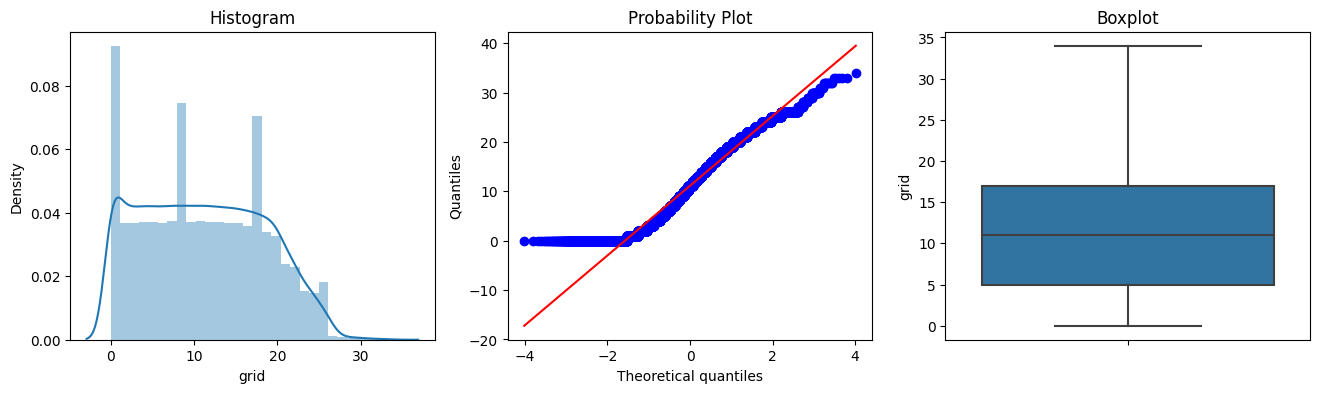

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1910976573.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


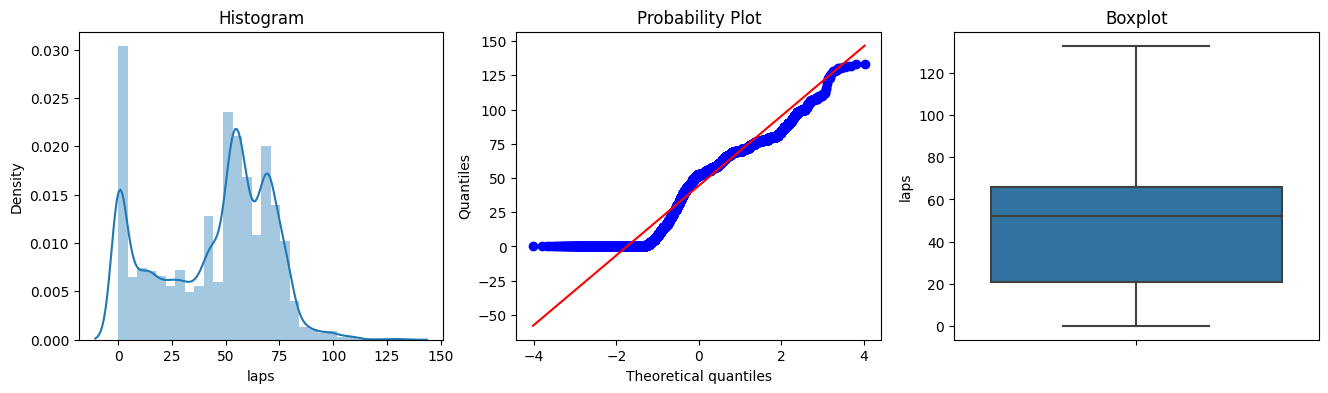

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1910976573.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


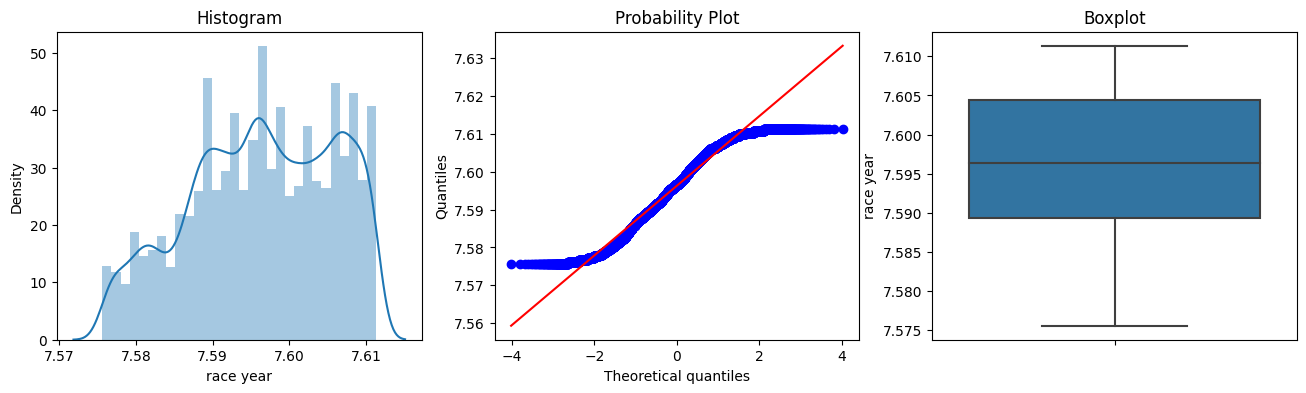

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1910976573.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


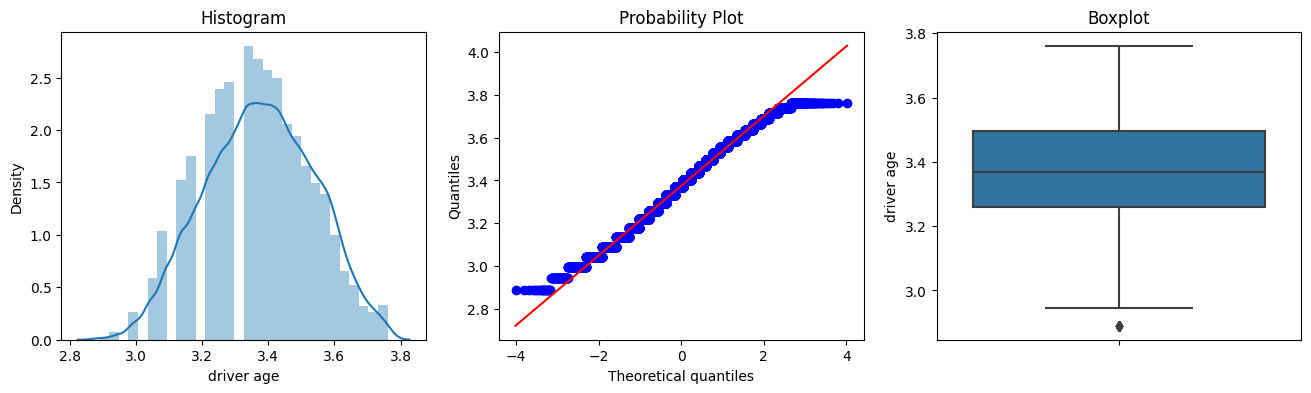

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1910976573.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


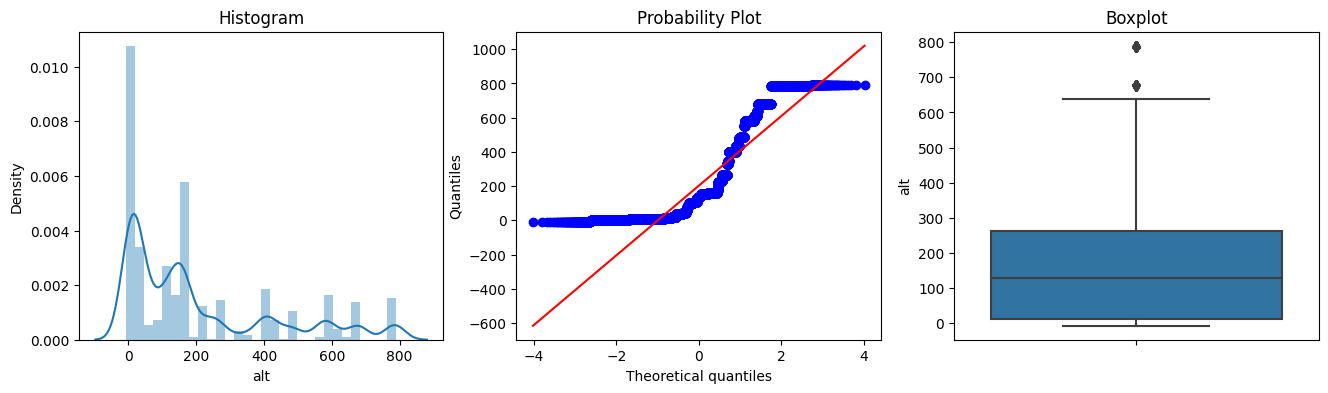

C:\Users\donsu\AppData\Local\Temp\ipykernel_3792\1910976573.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


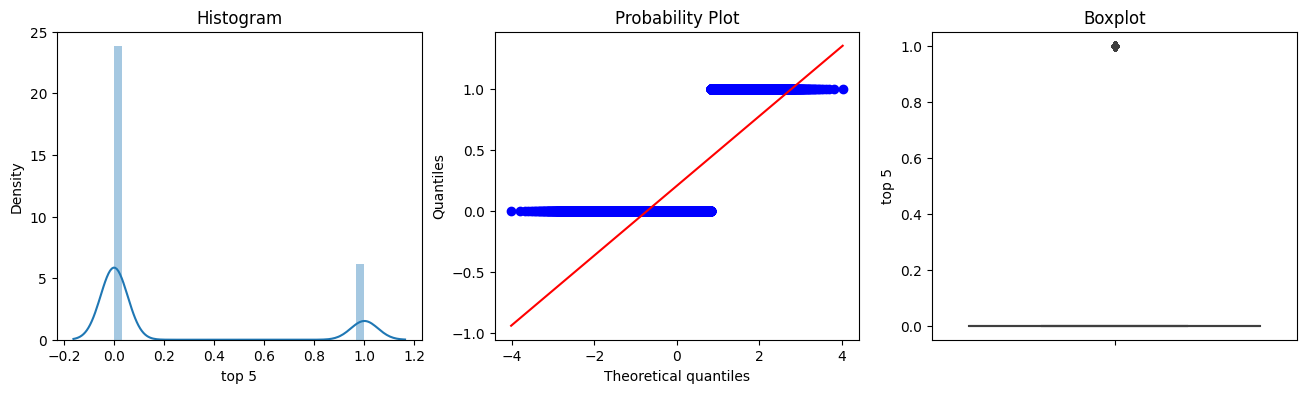

In [54]:
diagnostic_plots(data, 'grid')
diagnostic_plots(data, 'laps')
diagnostic_plots(data, 'race year')
diagnostic_plots(data, 'driver age')
diagnostic_plots(data, 'alt')
diagnostic_plots(data, 'top 5')

##### Train and Test Split

In [55]:
# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('top 5', axis=1), data['top 5'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((16416, 8), (7036, 8))

##### Encoding Categorical Variables

In [56]:
# One hot encoding for nationality, circuit name; constructor name column
ohe_enc = OneHotEncoder(
    top_categories=None,
    variables=['nationality', 'circuit name', 'constructor name'],
    drop_last=True)  # to return k-1, false to return k

In [57]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True,
              variables=['nationality', 'circuit name', 'constructor name'])

In [58]:
# we can see which variables the encoder will encode
ohe_enc.variables

['nationality', 'circuit name', 'constructor name']

In [59]:
# let's transform train and test set
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

c:\Users\donsu\.conda\envs\py38_env\lib\site-packages\feature_engine\encoding\one_hot.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
c:\Users\donsu\.conda\envs\py38_env\lib\site-packages\feature_engine\encoding\one_hot.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
c:\Users\donsu\.conda\envs\py38_env\lib\site-packages\feature_engine\encoding\one_hot.py:277: PerformanceWarning: Data

In [60]:
# let's inspect the encoded train set
X_train

grid  laps  race year  driver age  alt  nationality_Russian  \
25138    20    69   7.611348    3.091042  678                    1   
4204      1    45   7.599401    3.637586  103                    0   
13745    18    10   7.588830    3.465736  785                    0   
13096     0     0   7.589842    3.555348  103                    0   
20963    22    54   7.606387    3.433987    4                    0   
...     ...   ...        ...         ...  ...                  ...   
13922    10    53   7.588830    3.526361  432                    0   
21453     4    67   7.606885    3.218876  103                    0   
10338     2    79   7.592870    3.258097  484                    0   
11408    10    36   7.591862    3.583519  103                    0   
2732      1    67   7.601402    3.465736  578                    0   

       nationality_Austrian  nationality_Swedish  nationality_Italian  \
25138                     0                    0                    0   
4204                      1                    0                    0   
13745                     0                    1                    0   
13096                     0                    0                    1   
20963                     0                    0                    1   
...                     ...                  ...                  ...   
13922                     0                    0                    0   
21453                     0                    0                    0   
10338                     0                    0                    1   
11408                     0                    0                    0   
2732                      0                    0                    0   

       nationality_British  ...  constructor name_LDS-Alfa Romeo  \
25138                    0  ...                                0   
4204                     0  ...                                0   
13745                    0  ...                                0   
13096                    0  ...                                0   
20963                    0  ...                                0   
...                    ...  ...                              ...   
13922                    0  ...                                0   
21453                    0  ...                                0   
10338                    0  ...                                0   
11408                    1  ...                                0   
2732                     0  ...                                0   

       constructor name_Cooper-Borgward  constructor name_Fry  \
25138                                 0                     0   
4204                                  0                     0   
13745                                 0                     0   
13096                                 0                     0   
20963                                 0                     0   
...                                 ...                   ...   
13922                                 0                     0   
21453                                 0                     0   
10338                                 0                     0   
11408                                 0                     0   
2732                                  0                     0   

       constructor name_Stebro  constructor name_Christensen  \
25138                        0                             0   
4204                         0                             0   
13745                        0                             0   
13096                        0                             0   
20963                        0                             0   
...                        ...                           ...   
13922                        0                             0   
21453                        0                             0   
10338                        0                             0   
11408                        0                     

In [61]:
# when using the Power Transformer, NaNs are produced
# This is used to replace the NaNs as variable discretization cannot be carried out when NaNs are present
X_train = X_train.fillna((X_train.mean()), inplace=False)
X_test = X_test.fillna((X_test.mean()), inplace=False)

##### Variable Discretization / Binning

In [62]:
# EQUAL FREQUENCY DISCRETIZATION
disc = EqualFrequencyDiscretiser(q=10, variables = ['race year', 'alt'])

# 'grid', 'laps', 'race year', 'driver age', 'alt'

disc.fit(X_train)

EqualFrequencyDiscretiser(variables=['race year', 'alt'])

In [63]:
# the limits of the intervals are stored in the binner_dict_
disc.binner_dict_

{'race year': [-inf,
  7.582738488914411,
  7.587817219993427,
  7.590852123688581,
  7.593877844605118,
  7.596392304064196,
  7.599401333415815,
  7.602900462204755,
  7.605890001053122,
  7.60887062919126,
  inf],
 'alt': [-inf, 7.0, 12.0, 36.0, 88.0, 130.0, 162.0, 228.0, 401.0, 578.0, inf]}

In [64]:
# transform train and test sets
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

##### Feature Scaling

In [65]:
# STANDARD SCALER
sscaler = StandardScaler()
sscaler.fit(X_train)

X_train_sscaled = sscaler.transform(X_train)
X_test_sscaled = sscaler.transform(X_test)

X_train_sscaled = pd.DataFrame(X_train_sscaled, columns=X_train.columns)
X_test_sscaled = pd.DataFrame(X_test_sscaled, columns=X_test.columns)

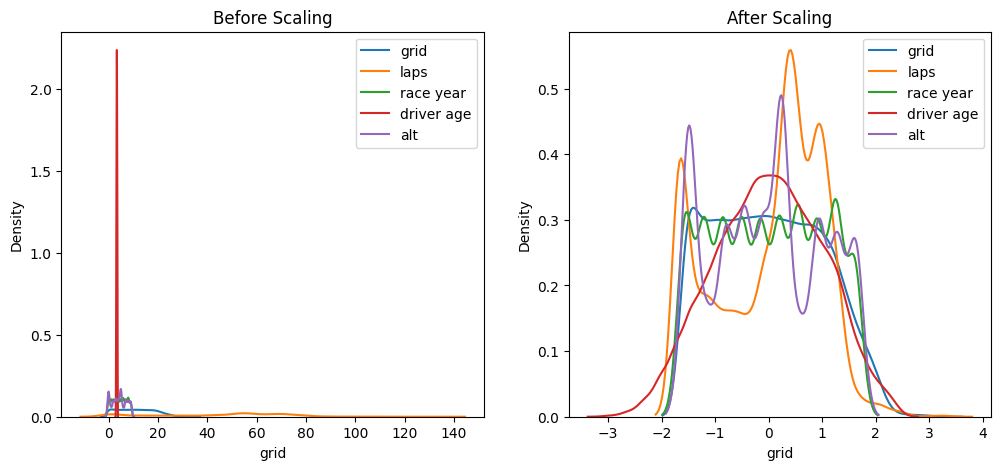

In [66]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['grid'], ax=ax1, label ='grid')
sns.kdeplot(X_train['laps'], ax=ax1, label ='laps')
sns.kdeplot(X_train['race year'], ax=ax1, label ='race year')
sns.kdeplot(X_train['driver age'], ax=ax1, label ='driver age')
sns.kdeplot(X_train['alt'], ax=ax1, label ='alt')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_sscaled['grid'], ax=ax2, label ='grid')
sns.kdeplot(X_train_sscaled['laps'], ax=ax2, label ='laps')
sns.kdeplot(X_train_sscaled['race year'], ax=ax2, label ='race year')
sns.kdeplot(X_train_sscaled['driver age'], ax=ax2, label ='driver age')
sns.kdeplot(X_train_sscaled['alt'], ax=ax2, label ='alt')
ax2.legend()
plt.show()

### Step 4: Machine Learning Modelling

##### Final Model

In [67]:
from sklearn.linear_model import LogisticRegression
logreg_ss = LogisticRegression(solver='liblinear') # you can experiment with different combinations of multi_class and solver
# logreg_ss = LogisticRegression(multi_class='multinomial', solver='lbfgs') # good option for larger datasets, fails here
logreg_ss.fit(X_train_sscaled, y_train)

LogisticRegression(solver='liblinear')

In [68]:
y_train_preds_logreg_ss = logreg_ss.predict(X_train_sscaled)

# insert code here
y_test_preds_logreg_ss = logreg_ss.predict(X_test_sscaled)

In [69]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_logreg_ss

train_accuracy_logreg_ss = accuracy_score(y_true, y_pred) * 100
print(f"The LogRegSS Model's accuracy on train data is {train_accuracy_logreg_ss:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg_ss

test_accuracy_logreg_ss = accuracy_score(y_true, y_pred) * 100
print(f"The LogRegSS Model's accuracy on test data is {test_accuracy_logreg_ss:.2f}%.")

The LogRegSS Model's accuracy on train data is 88.44%.
The LogRegSS Model's accuracy on test data is 87.71%.


# 2. Report <a id="2"></a>
[Back to top](#start)

### Report

Note: The uncommented code for a certain technique in the report is exactly what was used to get the result shown. Feel free to use it to check the results if needed.

## 1. Table of Contents <a id="part1"></a>

<a id="top"></a>
#### 1. [Table of Contents](#part1)

#### 2. [Introduction with Value Based Problem Statement](#part2)

#### 3. [Problem Formulation](#part3)
- [3.1 Load Data](#part3.1)
- [3.2 Explore and Understand the Data](#part3.2)
- [3.3 Formulate a Prediction Problem](#part3.3)

#### 4. [Data Wrangling on multiple tables](#part4)
- [4.1 Using Results Table as Main Table and Dropping resultId column](#part4.1)
- [4.2 Merge Drivers Table](#part4.2)
- [4.3 Check and Deal with NaNs for Each Column](#part4.3)
- [4.4 Get Race Year](#part4.4)
- [4.5 Merge Races Table](#part4.5)
- [4.6 Get Drivers' Age ](#part4.6)
- [4.7 Merge Circuits Table](#part4.7)
- [4.8 Merge Constructors Table](#part4.8)
- [4.9 Create Target Column](#part4.9)
- [4.10 Drop Columns](#part4.10)
- [4.11 Train, Test, Split](#part4.11)
- [4.12 One Hot Encode](#part4.12)
- [4.13 Naive Baseline Model](#part4.13)

#### 5. [Data Cleansing and Transformation](#part5)
- [5.1 Missing Values and Outliers](#part5.1)
- [5.2 Numerical Data Transformation](#part5.2)
- [5.3 Categorical Data Encoding](#part5.3)
- [5.4 Variable Discretization / Binning](#part5.4)
- [5.5 Scaling](#part5.5)

#### 6. [Final Model](#part6)
- [6.1 Count of Rows and Columns](#part6.1)
- [6.2 Machine Learning Model](#part6.2)

#### 7. [Summary and Further Improvements](#part7)
- [7.1 Summary & Findings](#part7.1)
- [7.2 Further Improvements](#part7.2)

## 2. Introduction with Value Based Problem Statement <a id="part2"></a>
[Back to top](#top)

F1 teams make millions every year from sponsors, manufacturers and more. They make the most from sponsors, followed by payments from the F1 competition, and then the manufacturers. To keep these revenue streams flowing, the driver representing the team has to win the race or at least come in among the top 5 drivers. Hence, the top 5 drivers matter as the F1 teams will receive more prize money and more sponsorship deals. This allows them to reinvest more money in the development of cars and enables them to continue to have a competitive advantage over their competitors. More wins mean better brand awareness for the constructors.

This report will help the F1 team make better driver recruitment or scouting decisions. This will increase the chances of winning for that particular F1 team as they picked the right driver to represent them. 

This report details the process of creating the machine learning model. First, specific data from multiple datasets are selected and merged. Then, a naive baseline model is created. Lastly, the final machine learning model is created. This report dives into the thought process and reasons for choosing a particular method for a certain process to give a better understanding of how the machine learning model is created. 

## 3. Problem Formulation <a id="part3"></a>
[Back to top](#top)

### 3.1 Load Data <a id="part3.1"></a>
[Back to top](#top)

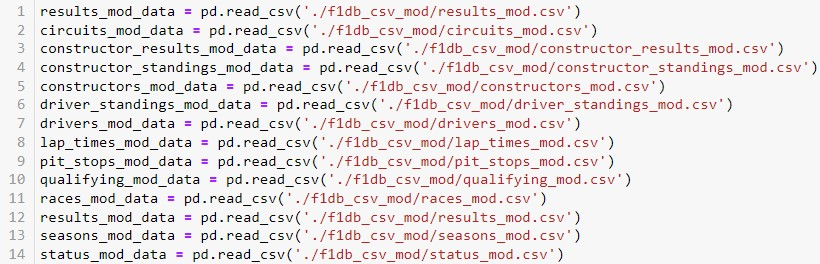

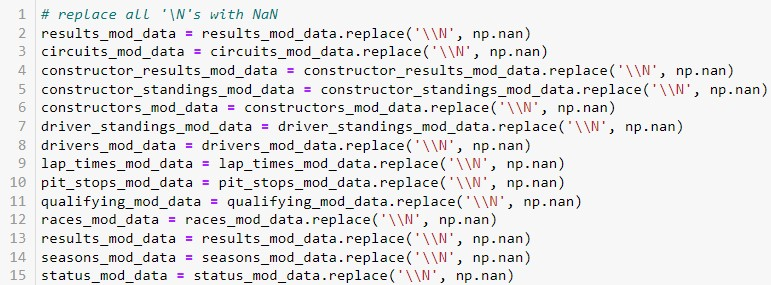

In total, there are 13 datasets provided. They contain lots of information about the drivers, constructors, results, seasons and more. All the data was loaded as the prediction problem at this time was still undecided. Furthermore, data exploration could be carried out for a deeper understanding of the data to help come up with a prediction problem.

An issue found in many of the datasets is that many contain '\N' values. In the beginning, it was confusing trying to figure out what it represented. It seemed like a common column that can be used to merge tables but also placeholder values. However, I realised that it represented a null value. Hence, I replaced '\N' with 'np.nan' for all the tables.

### 3.2 Explore and Understand the Data <a id="part3.2"></a>
[Back to top](#top)

#### 3.2.1 Correlation between laps and positionOrder

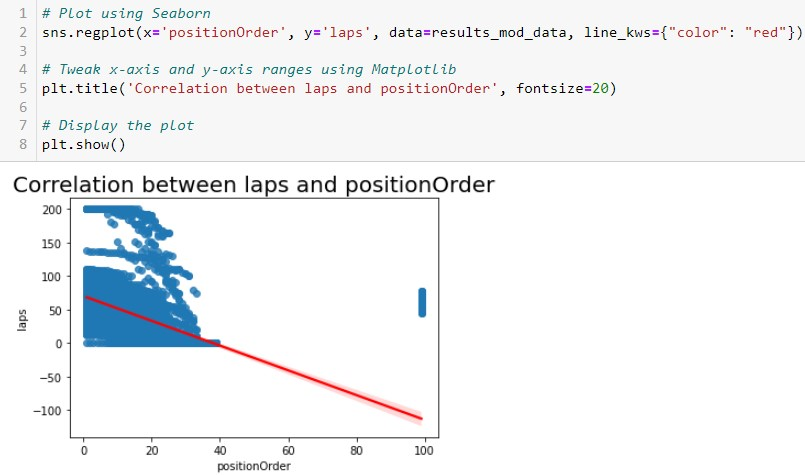

The scatterplot shows the correlation between the number of laps completed and the position of the driver. A scatter plot is used to plot the data points and a regression line is shown. Based on the regression line, laps and positionOrder have a negative correlation. This means that as laps, the number of completed laps, decreases, positionOrder, the position of the driver, increases.

#### 3.2.2 Correlation between grid and positionOrder

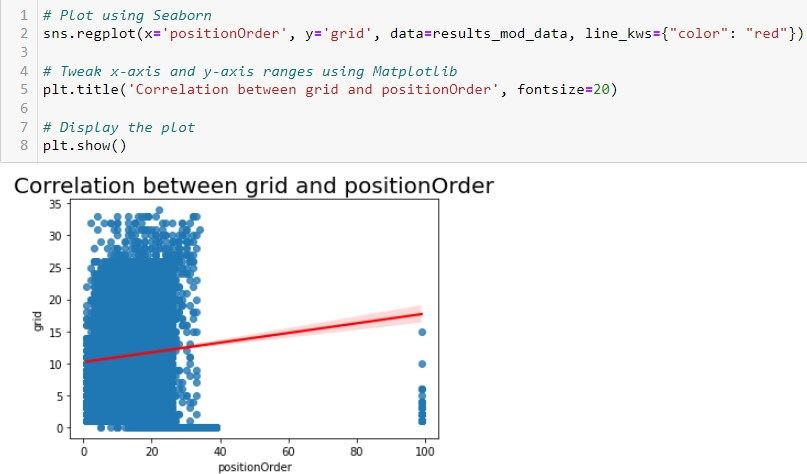

The scatterplot shows the correlation between the starting grid position and the position of the driver. A scatter plot is used to plot the data points and a regression line is shown. Based on the regression line, grid and positionOrder have a positive correlation. This means that as grid, the starting grid position, increases, positionOrder, the position of the driver, also increases.

#### 3.2.3 Correlation between points and positionOrder

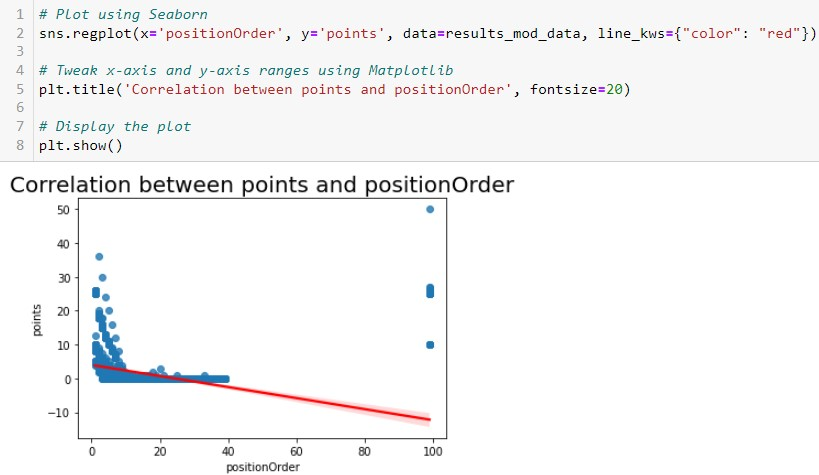

The scatterplot shows the correlation between the number of points the driver has and the position of the driver. A scatter plot is used to plot the data points and a regression line is shown. Based on the regression line, points and positionOrder have a negative correlation. This means that as points, the number of points the driver has, decreases, positionOrder, the position of the driver, increases. Simply put, the best driver has the highest number of points.

#### 3.2.4 Summary for all charts

From all the scatterplots plotted, it is observed that points, grid and laps affect the position of the driver. For both points and laps, a negative correlation is observed. For grid, a positive correlation is observed. Hence, predicting the position of the driver will make sense as factors affecting the position of the drivers have been understood after data exploration and data understanding.

 ### 3.3 Formulate a Prediction Problem <a id="part3.3"></a>
 [Back to top](#top)

After researching F1 teams, I found out that profitability is an issue for quite a number of F1 teams. Only the big hitters Red Bull and Mercedes made somewhere between $10-20 million in profit, while the remaining eight teams broke even, or at least came close. Hence, I set out to use the datasets given to me to predict the top 5 drivers. This improved the chance of scouting and recruiting a driver that has a higher chance of winning which will provide F1 teams with more money to continue developing better cars than their competitors.

The machine learning model will predict if the drivers are in the top 5. The factors that affect the position of the drivers must be known before the prediction can be carried out. Given the positions of drivers in the past, the model must predict if the drivers are in the top 5. This will allow F1 teams to make necessary adjustments to their current drivers or even recruit new drivers that will increase their chances of winning.

## 4. Data Wrangling on multiple tables <a id="part4"></a>
[Back to top](#top)

In the beginning, there was a huge confusion concerning which tables to merged. There were 13 tables and all seemed to provide important information for prediction. Hence, I decided to start with a main table. The main table will be the table that other tables are merged to.

### 4.1 Using Results Table as Main Table and Dropping resultId column <a id="part4.1"></a>
[Back to top](#top)

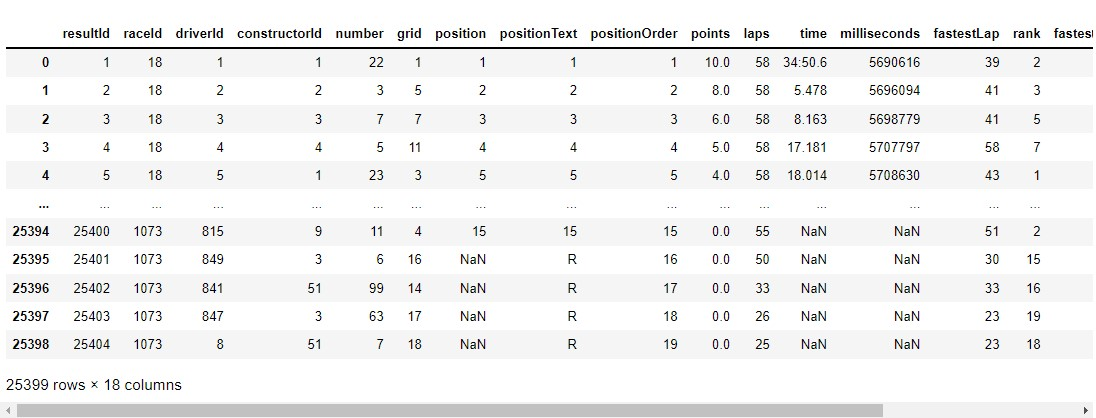

The Results table was used as the main table. This means that tables will be merged into the Results table. The reason for this choice is that the Results table contained columns that are good measures to predict multiple things, in this case, if the drivers are in the top 5. Therefore, I started with the Results table as the main table and decided to add on to it by merging other tables and adding more columns that contained information that would help predict if the drivers are in the top 5.

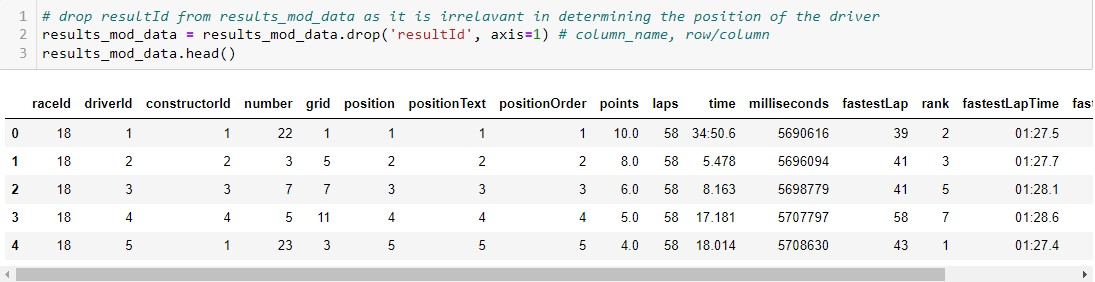

The next thing I went about doing was to remove the resultId column. The reason for doing it is that the resultId column is redundant when it comes to predicting if the drivers are in the top 5. Without doing this, unnecessary time and effort would have to go towards encoding this column as larger numbers are seen by the machine to be of a higher priority compared to smaller numbers. Since it did not add any value when predicting if the drivers are in the top 5, it made perfect sense to drop it.

### 4.2 Merge Drivers Table <a id="part4.2"></a>
[Back to top](#top)

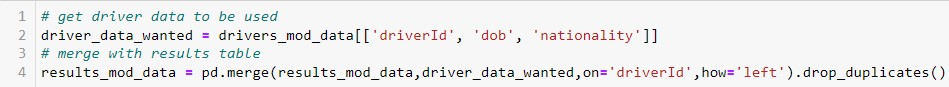

The Drivers table was merged with the Results table. However, not all the columns were included in the Drivers table. The reason is that not all the columns affected the results of my prediction. Hence, only three columns were added to the Drivers table. The three columns are driverId, dob, and nationality. 

The driverId is added as there needed to be a common column for both tables to be merged on.

The dob, date of birth, is added as it allows us to get the driver's age at the time of the race. More information on this at section 4.6 of the report.

Nationality is added as different countries could mean better access to better opportunities. For example, a driver coming from a less developed country might not have access to equally good training facilities compared to a driver that comes from a more developed country. Hence, it is added as it is a factor that can affect the chances of a driver making it into the top 5.

### 4.3 Check and Deal with NaNs for Each Column <a id="part4.3"></a>
[Back to top](#top)

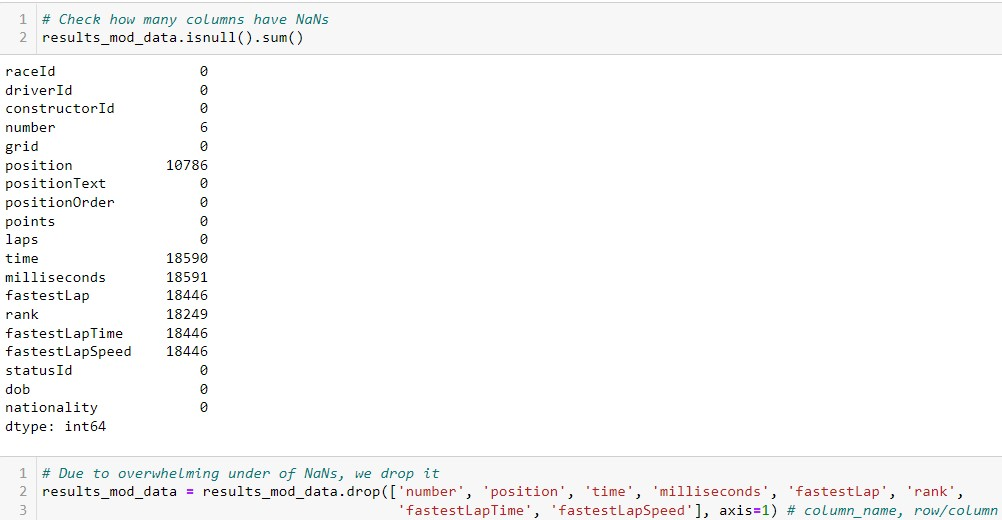

All columns were checked to see if they contained NaN values. This allowed me to gain a better understanding of the dataset. If there were not many NaN values. The more common used missing value imputation techniques would be considered. However, if there are many NaN values, replacing the NaN values with the mean, median, mode or an arbitrary value would not be a viable solution as it would distort the variable distribution.

Performing mean, median or mode imputation is not a good solution in this case. The reason is that there are 25399 rows and the position column has about 10786 missing values while the time, milliseconds, fastestLap, rank fastestLapTime, fastestLapSpeed columns have around 18000 to 19000 missing values. For the position column, almost half of the rows are missing. Of the remaining columns that have missing values, more than half have missing values. If mean, median or mode imputation is used, it would heavily distort the variable distribution.

Performing arbitrary imputation is also definitely not a good solution as one of the few assumptions when carrying out arbitrary imputation is that the data is not missing at random. With almost half of the rows with missing values for the position column, it is very hard to tell if data is missing at random. Same for the rest of the columns with missing values, it is extremely difficult to tell if data is missing at random. Another reason not to use arbitrary imputation is that the arbitrary value has to be not part of the dataset or the mean, median or mode of the data. This is a tremendously difficult condition to meet as almost all of the values all decimals. Hence, finding a number that is not part of the dataset or not the mean, median or mode value of the column will be very challenging. The last reason not to use arbitrary imputation is that it can distort the distributions of the original variables and may even create outliers.

As a result, all columns that contained NaN values were dropped.

### 4.4 Get Race Year <a id="part4.4"></a>
[Back to top](#top)

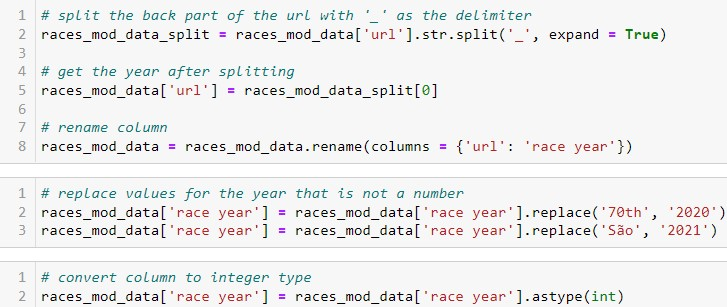

The race year was then derived by preprocessing the text and transforming the text. The urls were split by using underscore as the delimiter. The first element of the string array is assigned to the url column. The column name is changed from url to race year. This whole process retrieves the year of the race from the url. For 2 cases, the url does not include the year of the race. Hence, they were manually replaced from 70th to 2020 and Sao to 2021. Lastly, the column was changed to integer type. 

The race year is important as it allows us to know how old the driver is at the time of the race. The age of the driver at the time of the race is calculated under section 4.6 of the report

### 4.5 Merge Races Table <a id="part4.5"></a>
[Back to top](#top)

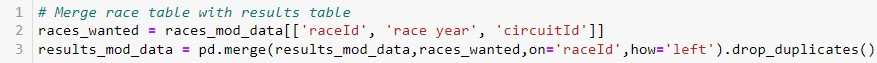

The Races table is merged with the Results table. However, not all columns of the Races table were merged with the Results table. The reason is that not all columns added value when it comes to predicting who the top 5 drivers would be. The columns that were merged include raceId, race year and circuitId.

The raceId column is added as it is needed to merge with the Results table as there had to be something in common to merge on.

The race year was added as it would provide the race year for each row to derive the age of the driver at the time of the race.

The circuitId is added as the Results table did not have that column. To merge the Circuits table with the Results table, there had to be a column both tables have to merge on. Since the Races table had the circuitId column it was added to the Results table.

### 4.6 Get Drivers' Age <a id="part4.6"></a>
[Back to top](#top)

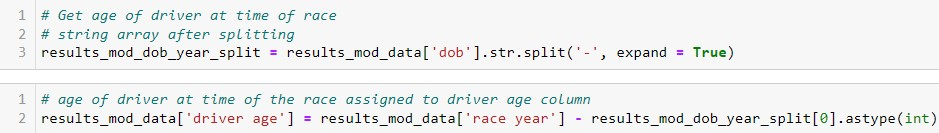

The age of the driver at the time of the race is derived. This is important as age can play a part when it comes to determining whether the driver will come in the top 5 positions or not as the older you are the body loses some of its sharpness and reflexes. At the same time, it could also show how much experience that driver has. 

### 4.7 Merge Circuits Table <a id="part4.7"></a>
[Back to top](#top)

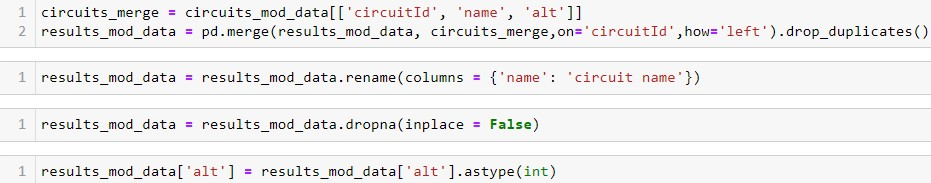

The Circuits table is merged with the Results table. However, not all columns in the Circuit table are merged. The columns that are merged are circuitId, name, and alt.

The circuitId has to be added as there has to be a common column between the Circuit table and the Results table to have something to merge on.

The circuit name is added as it is one of the factors that could affect the chances of a driver emerging in the top 5. There are different types of circuits. Some drivers might be more comfortable with a certain type of circuit. Hence, this affects the chances of them becoming the top 5.

The altitude is added as the change in altitude has a huge effect on how a Formula 1 car, and engine, responds and behaves and, as a result, it gives the engineers a huge extra technical challenge. Simply put, it might perform better or worse depending on the altitude. This can affect the chances of the driver becoming in the top 5.

The name column was renamed circuit name to be more specific and to avoid having the same name as any other column in the Results table. All NaN values were dropped. Then, the alt column was converted to an integer type.

### 4.8 Merge Constructors Table <a id="part4.8"></a>
[Back to top](#top)

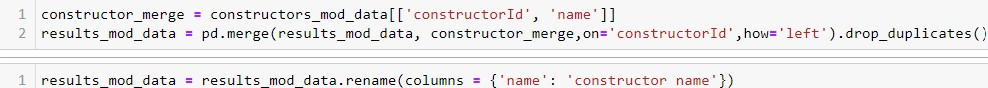

The Constructor table is merged with the Results table. However, not all columns were merged. The columns that are merged are the constructorId and name column.

The constructorId has to be added as there has to be a common column between the Constructor table and the Results table to have something to merge on.

The constructor name has to be added as they are either people or corporate entities that design the key parts of the car in Formula 1. Some might be better than others due to experience or due to the quality of the parts it produces. Hence, the constructor does play a part in the driver's chances of becoming in the top 5 and has to be added to the Results table. 

The name column is renamed to constructor name to be more specific and to avoid having the same name as any other column in the Results table.

### 4.9 Create Target Column <a id="part4.9"></a>
[Back to top](#top)

The target column, top 5, is created. The top 5 column is binary. It has 2 values. The 2 values are 1 and 0. 1 represents the drivers in the top 5 while 0 represents every other driver that is not in the top 5.

### 4.10 Drop Columns <a id="part4.10"></a>
[Back to top](#top)

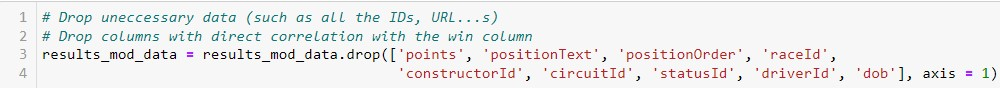

A total of 9 columns are dropped. The 9 columns are points, positionText, positionOrder, raceId, constructorId, circuitId, statusId, driverId, and dob.

The columns points, positionText, and positionOrder are removed due to direct correlation with the target column. Leaving it there would mean giving the model the answer, which is what it is supposed to predict. This will lead to an unreliable model. Removing columns that have a direct correlation with the target variable will increase the complexity of the algorithm, thus increasing the risk of errors. This makes the model more reliable.

The remaining columns raceId, constructorId, circuitId, statusId, driverId, and dob. These columns are removed due to redundancy as it does not add any value when it comes to predicting if the drivers are in the top 5. Especially for the Ids such as raceId, constructorId, circuitId, and statusId, it does not play a part in predicting if the drivers are in the top 5. Instead, it might make the model unreliable. This is because the Ids in some cases are large numbers. The machine prioritises large numbers and sees them as more important. If not removed, more time would have to be spent on encoding them to deal with them. Hence, dropping it makes perfect sense.

### 4.11 Train, Test, Split <a id="part4.11"></a>
[Back to top](#top)

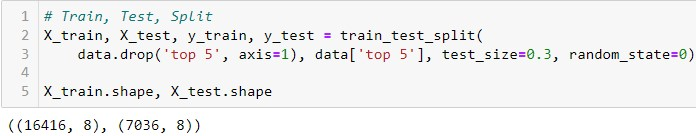

### 4.12 One Hot Encode <a id="part4.12"></a>
[Back to top](#top)

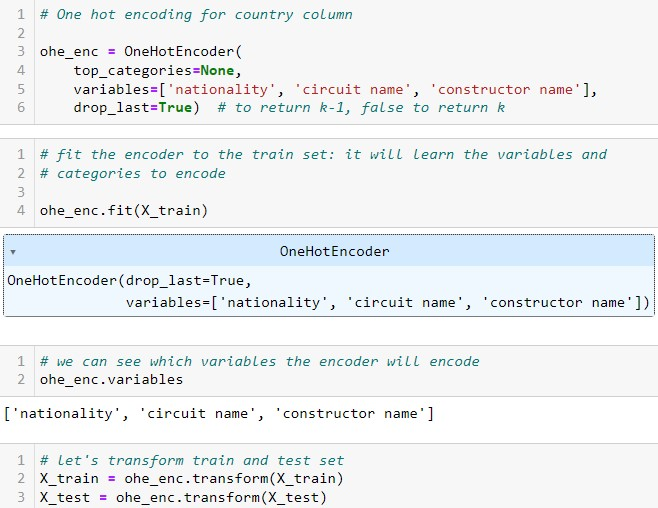

One Hot encoding is performed for all categorical variables. This is because the machine learning model can only accept numbers. Categorical data are often represented as strings. Encoding categorical data converts the categorical data into numerical data so it can be fed into the machine learning model.

### 4.13 Naive Baseline Model <a id="part4.13"></a>
[Back to top](#top)

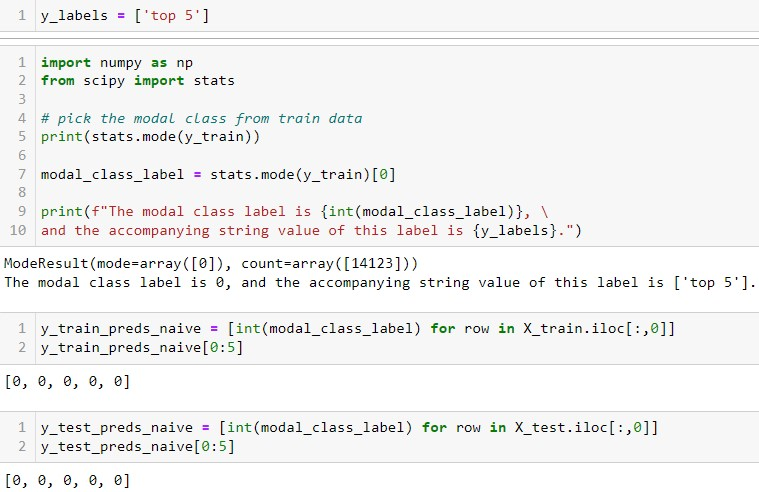

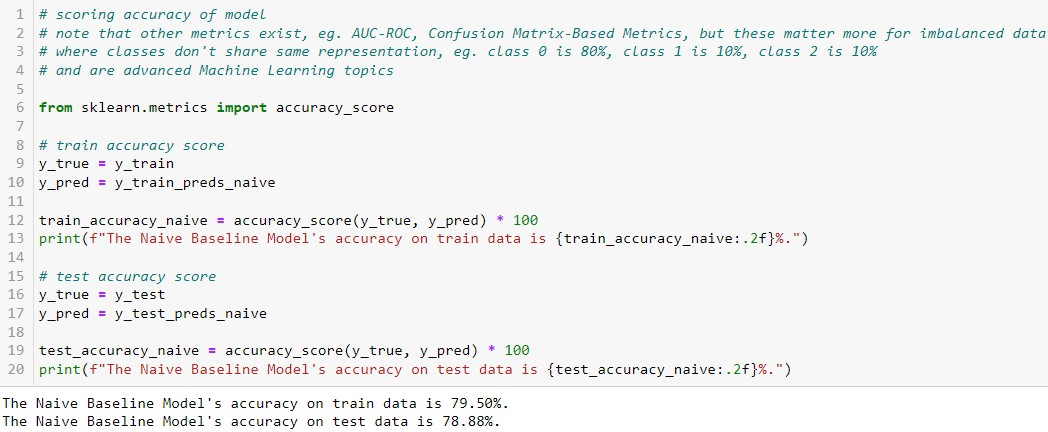

After data wrangling on multiple tables, the last step is to create a naive baseline model. A naive baseline model is for classification and normally predicts the modal class for every single prediction. It is a simple model that acts as a reference in a machine learning project. The main function of a baseline model is to contextualize the results of trained models. Baseline models typically lack complexity and may have little predictive power. Its results will be used to compare against the results of other machine learning models.

The results of the naive baseline model are as shown:

The Naive Baseline Model's accuracy on train data is 79.50%.
The Naive Baseline Model's accuracy on test data is 78.88%.

In total, 5 tables were merged. The 5 tables are the Results table, Drivers table, Races table, Circuits table, and Constructors table. After merging all tables, the table contained 23452 rows and 9 columns. Then, a target column called top 5 is created. After creating a target column, certain columns were dropped due to direct correlation and redundancy and then one hot encoding was performed. Finally, the data from the table after merging is fed into the model, producing the results as shown above.

## 5. Data Cleansing and Transformation <a id="part5"></a>
[Back to top](#top)

### 5.1 Missing Values and Outliers <a id="part5.1"></a>
[Back to top](#top)

#### 5.1.0 Check for Outliers

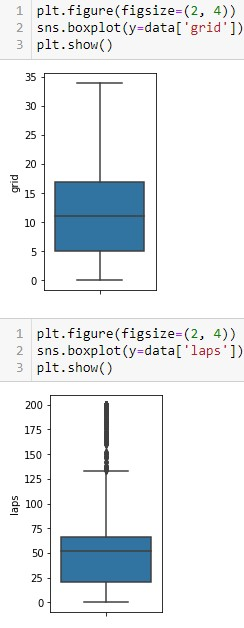

No outliers were found for the grid variable. When reviewing the box plot, there are no data points that are located outside the whiskers of the box plot. This tells us that there are no outliers.

Outliers were found for the laps variable. When reviewing the box plot, some data points are found to be located outside the whiskers of the box plot. This tells us that outliers are present.

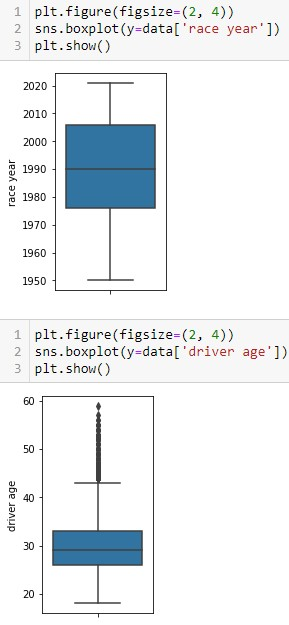

No outliers were found for the race year variable. When reviewing the box plot, there are no data points that are located outside the whiskers of the box plot. This tells us that there are no outliers.

Outliers were found for the driver age variable. When reviewing the box plot, some data points are found to be located outside the whiskers of the box plot. This tells us that outliers are present.

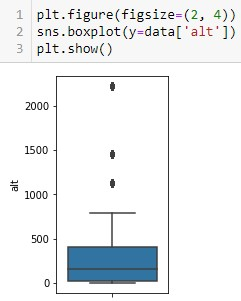

Outliers were found for the alt variable. When reviewing the box plot, some data points are found to be located outside the whiskers of the box plot. This tells us that outliers are present.

#### 5.1.1 Windsorization

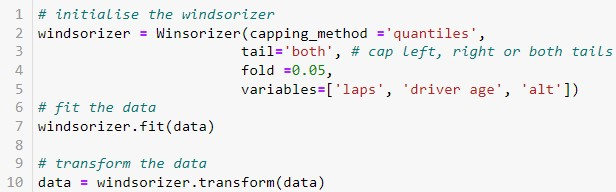

In [70]:
# # initialise the windsorizer
# windsorizer = Winsorizer(capping_method ='quantiles', 
#                         tail='both', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['laps', 'driver age', 'alt'])
# # fit the data
# windsorizer.fit(data)

# # transform the data
# data = windsorizer.transform(data)

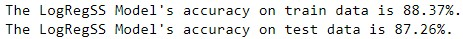

#### 5.1.2 Trimming

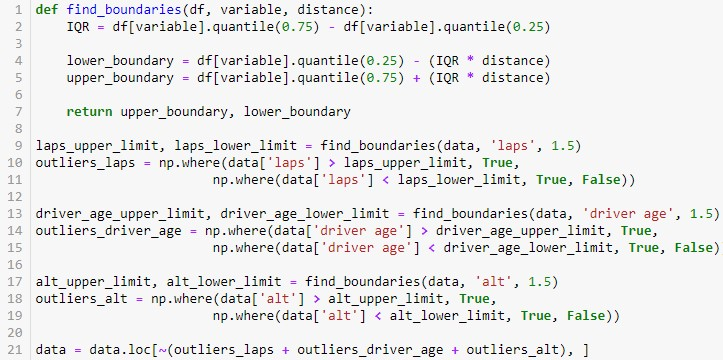

In [71]:
# def find_boundaries(df, variable, distance):
#     IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

#     lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
#     upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

#     return upper_boundary, lower_boundary

# laps_upper_limit, laps_lower_limit = find_boundaries(data, 'laps', 1.5)
# outliers_laps = np.where(data['laps'] > laps_upper_limit, True,
#                        np.where(data['laps'] < laps_lower_limit, True, False))

# driver_age_upper_limit, driver_age_lower_limit = find_boundaries(data, 'driver age', 1.5)
# outliers_driver_age = np.where(data['driver age'] > driver_age_upper_limit, True,
#                        np.where(data['driver age'] < driver_age_lower_limit, True, False))

# alt_upper_limit, alt_lower_limit = find_boundaries(data, 'alt', 1.5)
# outliers_alt = np.where(data['alt'] > alt_upper_limit, True,
#                        np.where(data['alt'] < alt_lower_limit, True, False))

# data = data.loc[~(outliers_laps + outliers_driver_age + outliers_alt), ] 

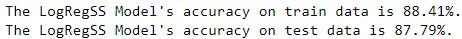

To identify outliers, box plots were used. Outliers were observed for 3 of the variables, laps, driver age, and alt. In the box plots, data points out of the whiskers were observed. Hence, outliers were found. The trimming method was used to deal with the outliers. In total, 2 methods were tried and tested, Windsorization and Trimming.

First, the Windsorisation method was tried and tested. The Windsorisation method transforms the data by limiting the extreme values, the outliers. Using the Windsorisation method did not give me a better result compared to when using the Trimming method. This is because the Windsorisation method does not remove extreme values, unlike the Trimming method. The Windsorisastion method simply replaces the extreme values with a specific percentile. I set the percentiles to be the 5th and 95th percentiles.

Next, the Trimming method was tried and tested. The result obtained was better than the result obtained when windsorisation was used. The reason for that is that the Trimming method removes observations that contain extreme values or outliers instead of replacing them with a specific percentile for the variable or variables chosen.

In the end, the Trimming method is used due to better results obtained.

### 5.2 Numerical Data Transformation <a id="part5.2"></a>
[Back to top](#top)

#### 5.2.0 No Numerical Transformation

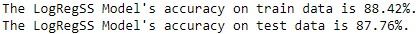

#### 5.2.1 YeoJohnson Transformer

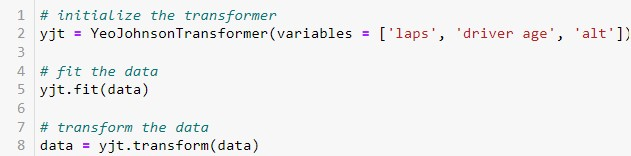

In [72]:
# # initialize the transformer
# yjt = YeoJohnsonTransformer(variables = ['laps', 'driver age', 'alt'])

# # fit the data
# yjt.fit(data)

# # transform the data
# data = yjt.transform(data)

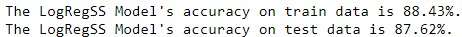

#### 5.2.2 Logarithmic Transformer

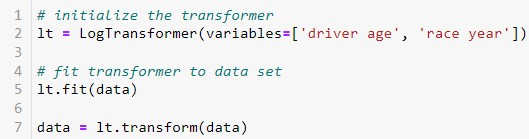

In [73]:
# # initialize the transformer
# lt = LogTransformer(variables=['driver age', 'race year']) 

# # fit transformer to data set
# lt.fit(data)

# data = lt.transform(data)

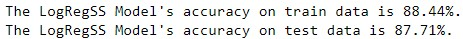

#### 5.2.3 Reciprocal Transformer

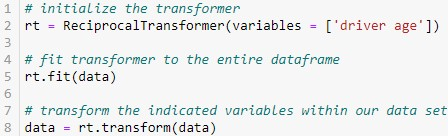

In [74]:
# # initialize the transformer
# rt = ReciprocalTransformer(variables = ['driver age']) 

# # fit transformer to the entire dataframe
# rt.fit(data)

# # transform the indicated variables within our data set
# data = rt.transform(data)

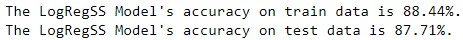

#### 5.2.4 Power Transformer

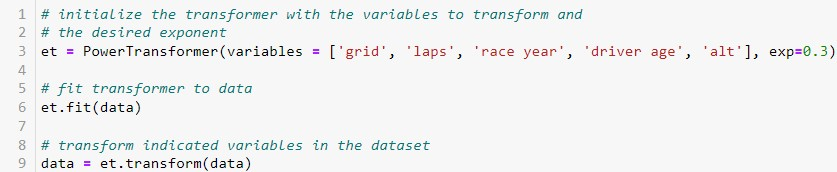

In [75]:
# # initialize the transformer with the variables to transform and 
# # the desired exponent
# et = PowerTransformer(variables = ['grid', 'laps', 'race year', 'driver age', 'alt'], exp=0.3)

# # fit transformer to data
# et.fit(data)

# # transform indicated variables in the dataset
# data = et.transform(data)

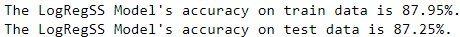

#### 5.2.5 Square Root Transformer

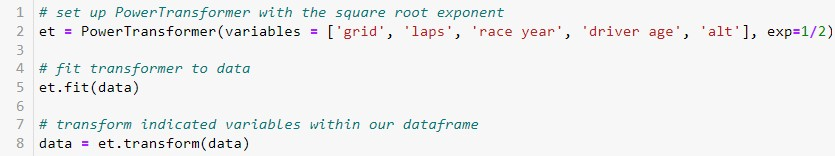

In [76]:
# # set up PowerTransformer with the square root exponent
# et = PowerTransformer(variables = ['grid', 'laps', 'race year', 'driver age', 'alt'], exp=1/2) 

# # fit transformer to data 
# et.fit(data)

# # transform indicated variables within our dataframe
# data = et.transform(data)

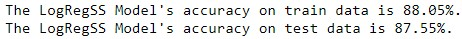

#### 5.2.6 Cube Root Transformer

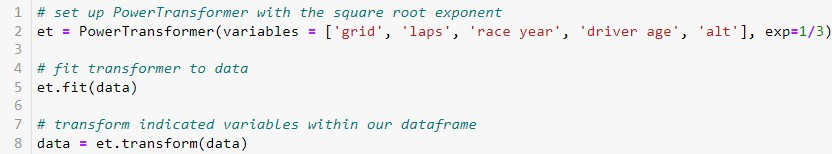

In [77]:
# # set up PowerTransformer with the square root exponent
# et = PowerTransformer(variables = ['grid', 'laps', 'race year', 'driver age', 'alt'], exp=1/3) 

# # fit transformer to data 
# et.fit(data)

# # transform indicated variables within our dataframe
# data = et.transform(data)

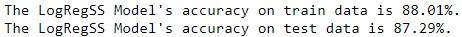

#### 5.2.7 BoxCox Transformer

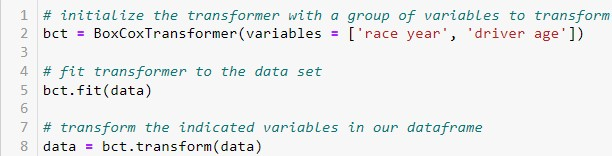

In [78]:
# # initialize the transformer with a group of variables to transform
# bct = BoxCoxTransformer(variables = ['race year', 'driver age']) 

# # fit transformer to the data set
# bct.fit(data)

# # transform the indicated variables in our dataframe
# data = bct.transform(data)

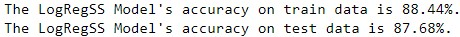

For numerical data transformation, 6 methods were tried and tested. The 6 methods include Yeo Johnson Transformer, Logarithmic Transformer, Reciprocal Transformer, Square Cube Root Transformer, Power Transformer and BoxCox Transformer. All methods were carried out for different variables being mixed and matched. The best result for each transformer is shown. 

The purpose of transforming the numerical variables is to improve the fit of the model by transforming the distribution of the features to a more normally-shaped bell curve.

Transformation was carried out as the result obtained without transformation was not as good as compared to when transformation was applied.

The YeoJohnson transformer accepts all values for the variable X, the variable to be transformed. Logarithmic transformer and BoxCox transformer only accepts positive values for the variable X. The Reciprocal only accepts values for the variable X when it is non-zero. The Power transformer only accepts the variable X, based on the value of lambda. Furthermore, the Logarithmic and Reciprocal transformers have a strong effect on the shape of the variable distribution, while the rest of the transformers try different lambda values to determine which is the best. 

After trying all the different transformers, the Logarithmic and Reciprocal transformers produced the same and the best result among all the other transformers. Both improved the results of the model. It was difficult choosing between both as both have a strong effect on the shape of the variable distribution. In the end, the Logarithmic transformer was chosen as it produced the best results while transforming 2 variables while the Reciprocal transformer produced the best results while transforming only one variable.

### 5.3 Categorical Data Encoding <a id="part5.3"></a>
[Back to top](#top)

#### 5.3.1 One Hot Encoding

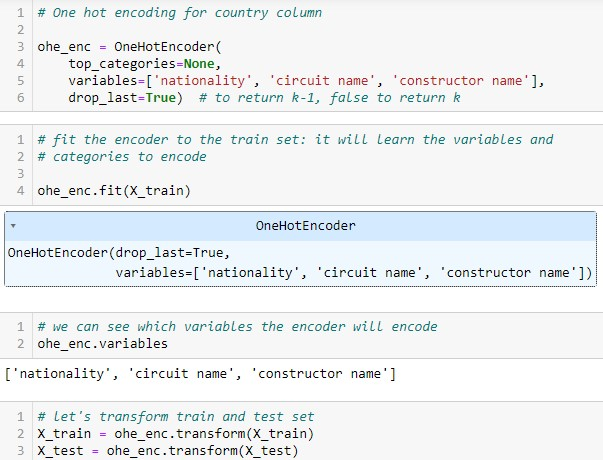

In [79]:
# ohe_enc = OneHotEncoder(
#     top_categories=None,
#     variables=['nationality', 'circuit name', 'constructor name'],
#     drop_last=True)  # to return k-1, false to return k

# # fit the encoder to the train set: it will learn the variables and 
# # categories to encode
# ohe_enc.fit(X_train)

# # we can see which variables the encoder will encode
# ohe_enc.variables

# # let's transform train and test set
# X_train = ohe_enc.transform(X_train)
# X_test = ohe_enc.transform(X_test)

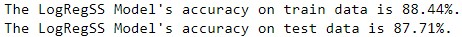

##### Reference for count or frequency encoding

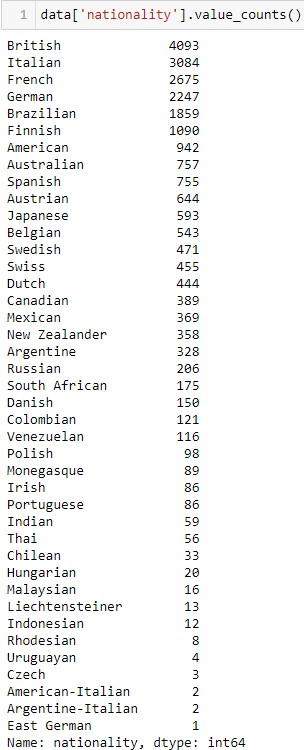

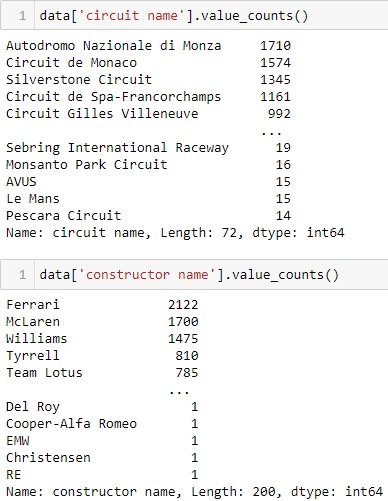

##### Reference for rare categories encoding

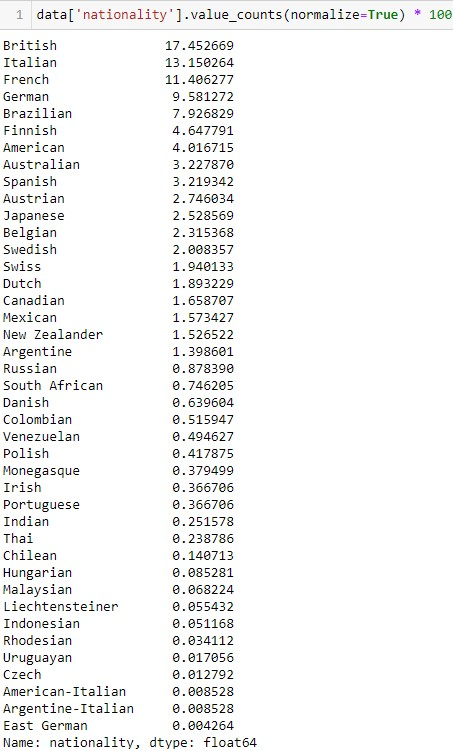

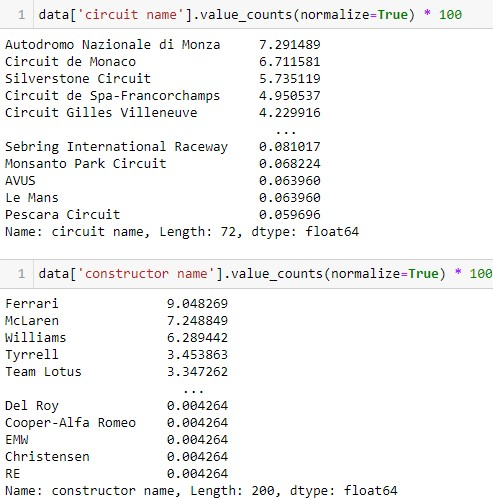

For categorical data encoding, one hot encoding is used. It is used on the variables: nationality, circuit name, and constructor name. All encoding methods have been considered but only one hot encoding was tried and tested. The reason is that other methods cannot be used. More details are provided below.

Label or Ordinal encoding cannot be used as the order does not matter for all of the variables. Label or Ordinal encoding is used when the order matters. For example, the level of education. A PhD is a higher level of education compared to a diploma. It is only in these cases that label or ordinal encoding should be used. The reason for that is that the machine prioritises larger numbers and perceives larger numbers as more important while smaller numbers are deemed less important and of lower priority. Since none of the variables has values where the order matters, it does not make sense to use this method of encoding as it simply adds an unnecessary bias to the machine learning model. This would make the machine learning model less accurate and less reliable.

Count or Frequency encoding cannot be used as many unique values appear the same number of times for each of the respective columns. In the nationality column, the value Irish and Portuguese both appear 86 times. In the circuit name column, the values AVUS and Le Mans both appear 15 times. In the constructor name column, it is observed that many values appear once. If Count or Frequency encoding is applied, different categories will be encoded with the same value. This means that the machine will view categories that are supposed to be different as the same category. This might make the model's performance improve due to less complexity, but it makes the model less accurate and less reliable. Hence, it cannot be used.

Target or Mean encoding cannot be used as the average target value could be the same for multiple categories. Since the target column only has 2 values 1 and 0, there is an extremely high chance that many categories will be encoded with the same value as the mean of many categories would be 0. The mean is derived by taking the sum of the target variable for that category and dividing it by the number of times that category appears. For example, nationalities that have never won would have 0 as the mean. This results in 0 being used to represent multiple categories. This means that the machine will view categories that are supposed to be different as the same category. This might make the model's performance improve due to less complexity, but it makes the model less accurate and less reliable. Thus, it cannot be used.

Encoding with ordered integers cannot be used as it replaces the categories with arbitrary or ordered integers. These numbers are derived by calculating the mean value of the target per category and then assigning numbers to each category based on the mean value. As mentioned above, there might be many categories with the same mean as the target column has only two values, 1 and 0. Hence, multiple categories might be represented with the same value. The machine will view categories that are supposed to be different as the same category. This might make the model's performance improve due to less complexity, but it makes the model less accurate and less reliable. If arbitrary integers are used to encode the categories, this might add some unnecessary bias as it would be similar to label or ordinal encoding. This will result in the machine prioritising larger numbers and perceiving larger numbers as more important while smaller numbers are deemed less important and of lower priority. There is even a chance for outliers being created. Thus, it cannot be used as it will make the model less accurate and less reliable. 

Rare categories encoding cannot be used as there are many unique variables for each of the columns. This leads to a very small percentage for the categories that appear the least as a percentage of the whole dataset. If a small percentage like 1% or 5% is stated to determine which of the categories will be considered rare, in some cases, half of all the categories would be considered rare. This is because the percentage of the dataset for the top categories that appear the most is much higher than those at the bottom. This would not make the machine learning model very reliable as too many categories might be grouped under the rare category, reducing its complexity.

In the end, one hot encoding is used. Despite having a lot more new columns, 300 new columns, being created, it can still be used as it meets another condition. There are more than 5 times more columns than rows. This means that there is not a high ratio of columns to rows. Therefore, one hot encoding is used.

### 5.4 Variable Discretization / Binning <a id="part5.4"></a>
[Back to top](#top)

#### 5.4.1 Equal Frequency Discretization

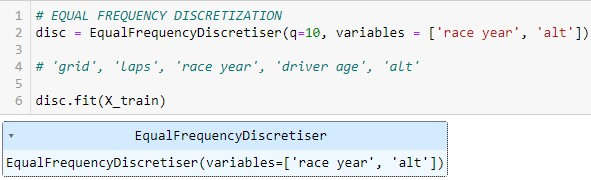

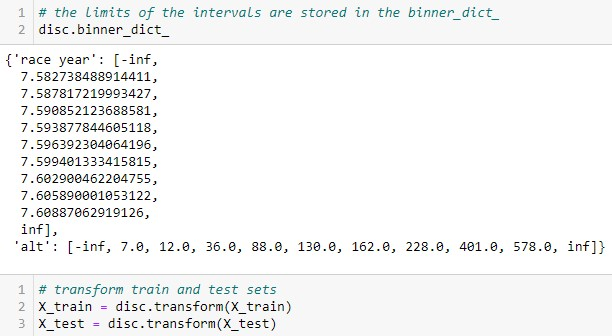

In [80]:
# # EQUAL FREQUENCY DISCRETIZATION
# disc = EqualFrequencyDiscretiser(q=10, variables = ['race year', 'alt'])

# # 'grid', 'laps', 'race year', 'driver age', 'alt'

# disc.fit(X_train)

In [81]:
# # the limits of the intervals are stored in the binner_dict_
# disc.binner_dict_

In [82]:
# # transform train and test sets
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

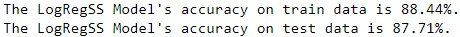

#### 5.4.2 Equal Width Discretization

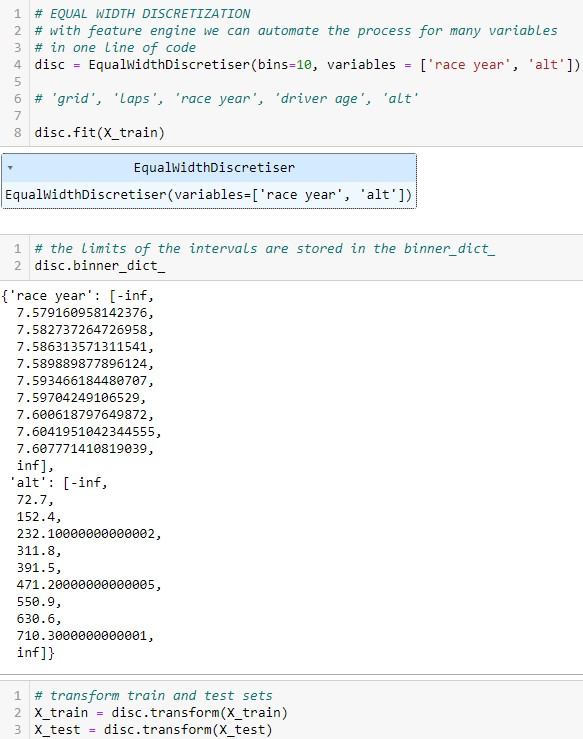

In [83]:
# # EQUAL WIDTH DISCRETIZATION
# # with feature engine we can automate the process for many variables
# # in one line of code
# disc = EqualWidthDiscretiser(bins=10, variables = ['race year', 'alt'])

# # 'grid', 'laps', 'race year', 'driver age', 'alt'

# disc.fit(X_train)

In [84]:
# # the limits of the intervals are stored in the binner_dict_
# disc.binner_dict_

In [85]:
# # transform train and test sets
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

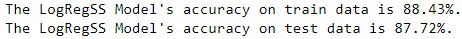

Two methods of variable discretization or binning were tested, EqualWidth and EqualFrequency discretization. It was more for trial and error. The reason for testing is that the model did not perform as well without variable discretization compared to when variable discretization was carried out. Hence, the two methods were tested. The first, EqualWidth discretization, worsened the model's performance. The second, EqualFrequency discretization, improved the model's performance. Hence, EqualFrequency discretization was used as it improved the model's performance. Both methods were tried and tested on the race year and alt variables as they cannot be counted. Simply put, both are not discrete, but are continuous variables. Hence, variable discretization or binning was applied to these variables to transform them into discrete variables by creating a set of contiguous intervals.

### 5.5 Scaling <a id="part5.5"></a>
[Back to top](#top)

#### 5.5.1 Standard Scaler

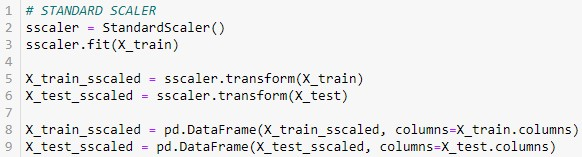

In [86]:
# # STANDARD SCALER
# sscaler = StandardScaler()
# sscaler.fit(X_train)

# X_train_sscaled = sscaler.transform(X_train)
# X_test_sscaled = sscaler.transform(X_test)

# X_train_sscaled = pd.DataFrame(X_train_sscaled, columns=X_train.columns)
# X_test_sscaled = pd.DataFrame(X_test_sscaled, columns=X_test.columns)

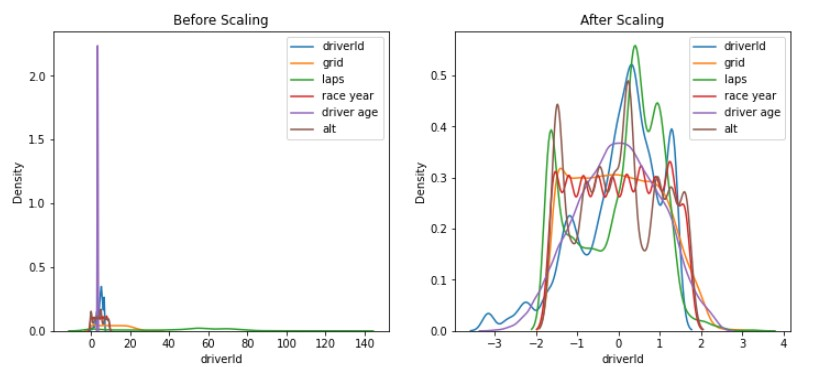

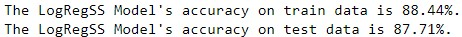

#### 5.5.2 MinMax Scaler

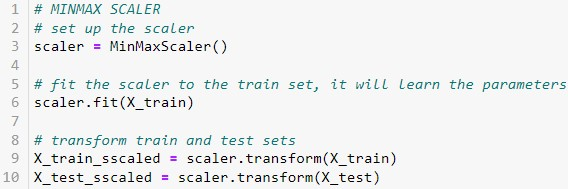

In [87]:
# # MINMAX SCALER
# # set up the scaler
# scaler = MinMaxScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(X_train)

# # transform train and test sets
# X_train_sscaled = scaler.transform(X_train)
# X_test_sscaled = scaler.transform(X_test)

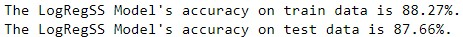

#### 5.5.3 Mean Normalisation

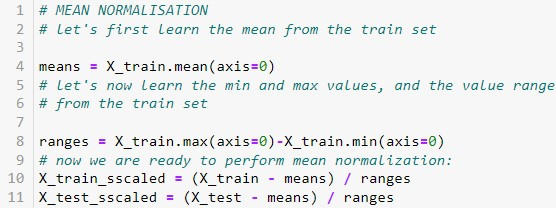

In [88]:
# # MEAN NORMALISATION
# # let's first learn the mean from the train set

# means = X_train.mean(axis=0)
# # let's now learn the min and max values, and the value range 
# # from the train set

# ranges = X_train.max(axis=0)-X_train.min(axis=0)
# # now we are ready to perform mean normalization:
# X_train_sscaled = (X_train - means) / ranges
# X_test_sscaled = (X_test - means) / ranges

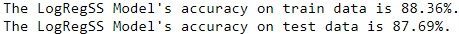

#### 5.5.4 MaxAbsScaler 

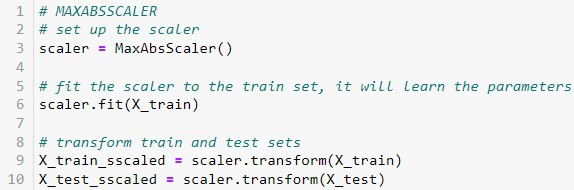

In [89]:
# # MAXABSSCALER
# # set up the scaler
# scaler = MaxAbsScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(X_train)

# # transform train and test sets
# X_train_sscaled = scaler.transform(X_train)
# X_test_sscaled = scaler.transform(X_test)

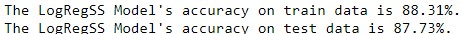

#### 5.5.5 Robust Scaler 

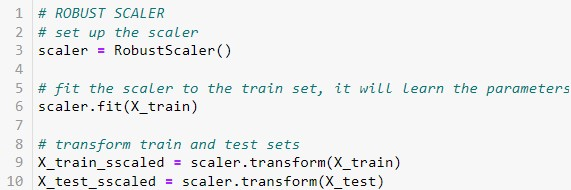

In [90]:
# # ROBUST SCALER
# # set up the scaler
# scaler = RobustScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(X_train)

# # transform train and test sets
# X_train_sscaled = scaler.transform(X_train)
# X_test_sscaled = scaler.transform(X_test)

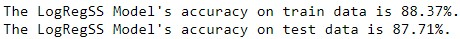

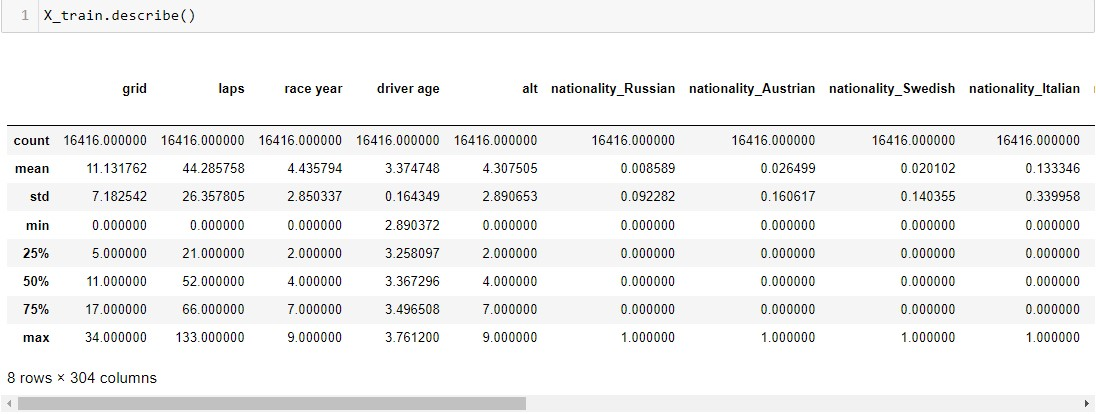

For Scaling, all methods have been tried and tested. Standard Scaler is used as it produced the best result.

Feature Scaling is a technique used to standardize the independent features in the data in a fixed range. The reason this is done is that features with larger value ranges tend to dominate over features with smaller ranges. Feature scaling can also be used to compare the importance of features. For example, the model will perceive 3000m to be more than 4km as the number 3000 is much larger than 4. By scaling all the variables to a similar level, they are treated fairly, with each variable not being more dominant than another. Thus, scaling is used to solve this problem.

The MinMaxScaler squeezes the values of the variables between 0 and 1 and is performed by subtracting the minimum value from all observations and dividing the result by the value range. Since the model's performance did not improve at all but worsened, MinMaxScaler was not applied.

MaxAbScaling scales the data to its maximum value by dividing every observation by the maximum value of the variable. The result of the transformation is a distribution in which the values vary approximately within the range of -1 to 1. MaxAbScaling should be used on data centred at 0. From the X_train.describe(), some variables are not centred at 0. Hence, these two reasons could be what caused the model's performance to worsen when MaxAbScaling was applied

Robust Scaling is done by having the median value removed from the observations and having the result divided by the inter-quartile range. This method was not chosen as it did not improve the model and the data does not contain outliers. This method of scaling is recommended for data that contains outliers. Since the data provided does not contain outliers as the outliers have been dealt with above with the Trimming method, this method of scaling was not chosen.

Mean Normalization centres the variable at zero and rescales the distribution to the value range. It is done by subtracting the mean from each observation and then dividing the result by the difference between the minimum and maximum values. The reason Mean Normalisation was tried and tested is that not all variables are normally distributed or have a Gaussian distribution. Unlike standard scaler that assumes that all variables are normally distributed or have a Gaussian distribution, Mean Normalisation does not. Since the result produced when Mean Normalization is used did not improve the model's performance, it was not used.

The Standard Scaler centres the variable at 0 and standardizes the variance to 1. The result is a z-score which represents how many standard deviations a given observation deviates from the mean. In this case, the Standard Scaler produced the best results. Therefore, it was used.

## 6. Final Model <a id="part6"></a>
[Back to top](#top)

### 6.1 Count of Rows and Columns  <a id="part6.1"></a>
[Back to top](#top)

#### Count of Rows and Columns after merging

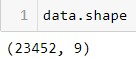

#### Count of Rows and Columns for X_train

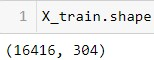

#### Count of Rows and Columns for X_test

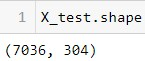

### 6.2 Machine Learning Model <a id="part6.2"></a>
[Back to top](#top)

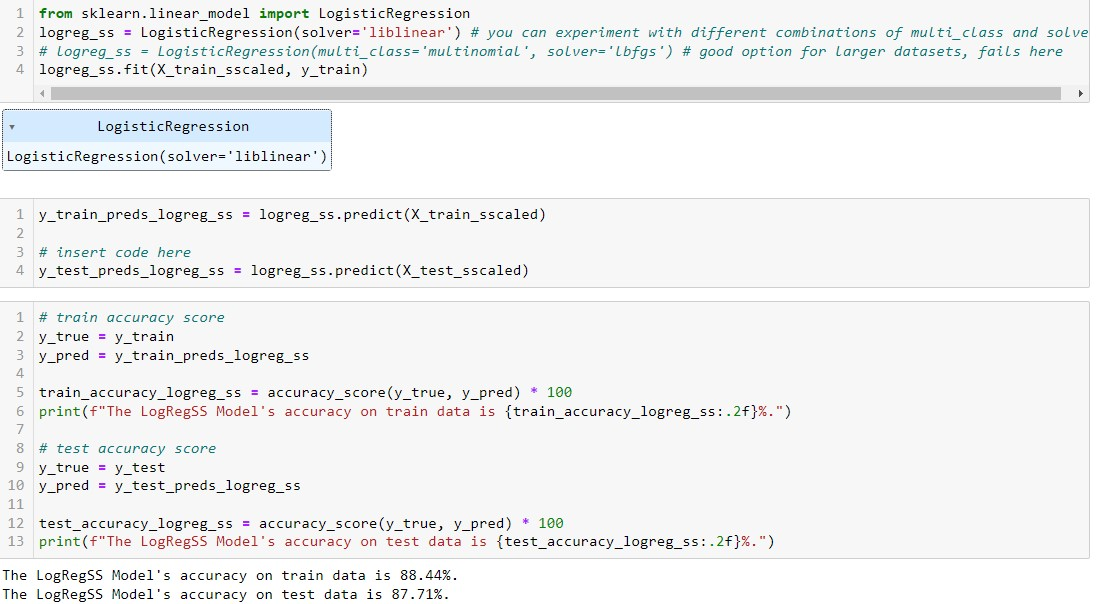

The result of the naive baseline model is shown

The Naive Baseline Model's accuracy on train data is 79.50%.
The Naive Baseline Model's accuracy on test data is 78.88%.

The result of the final model is shown

The LogRegSS Model's accuracy on train data is 88.44%. 
The LogRegSS Model's accuracy on test data is 87.71%.


Improved accuracy is observed in both the train and test data for the final model compared to the naive baseline model. The accuracy of the train data increased by 8.94%, from 79.50% to 88.44%. The accuracy of the test data increased by 8.83%, from 78.88% to 87.71%. 

The naive baseline model is a model into which little effort has been put. It is mainly used as a comparison. If the final model does not beat the naive baseline model, it cannot be accepted. If the final model result beats the naive baseline model, it is a good result. In this case, the final model performed better than the naive baseline model by around 8-9% for both the train and test data. This means that the final model can be accepted.

When building the final model, many Data Wrangling techniques have been used.

Some of the techniques and methods used for different steps are highlighted below.

Firstly, Trimming is used to deal with the outliers found in the 3 variables. The 3 variables are laps, driver age, and alt. Another method, Windsorization, was tried and tested. However, it worsened the performance of the model. Hence, Trimming was used instead of Windsorization.

Second, transformation of numerical variables was carried out. All 6 methods have been tried and tested. The 6 methods are YeoJohnson transformer, Logarithmic transformer, Reciprocal transformer, Power transformer, SquareCubeRoot transformer, and BoxCox transformer. Logarithmic transformer and Reciprocal transformer produced the same result. However, Logarithmic Transformer was chosen since it accepted and transformed more variables than Reciprocal transformer.

Third, categorical data encoding was carried out. All methods of encoding categorical data were considered but One Hot Encoding was used. The main methods considered will be detailed here. Label or Ordinal encoding was not used as it added unnecessary bias. This is due to the model prioritising larger numbers and perceiving larger numbers are more important compared to smaller numbers. Count or Frequency encoding could not be used as different categories appeared the same number of times. As a result, different categories would be represented by the same value. Target or Mean encoding was not used as many categories would be represented with 0 as some categories did not come in the top 5. Hence, the mean will be 0. This would result in different categories being represented by the same value. Other than One Hot encoding, all the other methods would result in the model being less reliable and less accurate. Therefore, One Hot encoding is used.

Fourth, variable discretization or binning was carried out. Two methods were tried and tested, Equal Frequency discretization and Equal Width discretization. There was no particular logic with regards to why certain methods were chosen as it was down to trial and error. However, Equal Frequency discretization was used as it produced the best result.

Lastly, feature scaling was carried out. All methods for feature scaling were tried and tested. Likewise, there was no particular logic as to why certain methods were chosen as it was down to trial and error. However, Standard Scaler was used as it produced the best result.

This is the combination of Data Wrangling techniques used to obtain the result for the final model shown above.

## 7. Summary and Further Improvements <a id="part7"></a>
[Back to top](#top)

### 7.1 Summary & Findings <a id="part7.1"></a>
[Back to top](#top)

In conclusion, one finding is that the different methods that I tried and tested did not significantly improve the model. The thing that did improve the model is what I added to the dataset when merging tables. Based on the results shown, none of it was heavily affected by a different method used, whether it be scaling or transformation or any other Data Wrangling technique. I built the model more than once. What affected the results is what I added to the dataset that is fed into the model. 

Another finding is that I should think deeper when it comes to every action I take. This is especially important as at the beginning of the assignment, every move I made could not be explained. It was simply trial and error. This led to a few bad models that could not beat the naive baseline model. The lesson here is to have a reason for every move I make so that when the result is not as good, I know how to improve it.

Overall, I am pleased with the result of the final model. With these findings, I gained lots of insight and learnt so much more about Data Wrangling.

### 7.2 Further Improvements <a id="part7.2"></a>
[Back to top](#top)

One further improvement will be the efficiency of my code. This can be done by shortening a few lines of code to be written in one. If functions are used, I could reduce the number of lines of code. An example would be when merging tables, a function could be used for that as the same line of code is repeated throughout the process when merging tables.

Another further improvement is to attempt more than one Data Wrangling technique at the same. For example, there is a way to carry out variable discretization or binning and encoding of categorical variables at the same time. This should be used to carry out 2 Data Wrangling techniques at the same time for better efficiency when carrying out multiple Data Wrangling techniques.